### О задании

Задание состоит из последовательных вопросов (отвечать на них обязательно, код и графики без интерпретации не имеют никакого смысла, иначе - снижение баллов), посвященных работе с табличными данными, но на более низком уровне с помощью Numpy

Баллы даются за выполнение отдельных пунктов (Максимальное количество баллов за эту Л.Р. - 5)

Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

***DeadLine - 05.03.2024 23:59***

UPD: По просьбам трудящихся продлен Deadline:

***DeadLine - 11.03.2024 23:59***


## Инструкция по сдаче ДЗ.



0. Просмотр лекции обязателен. Не потому что без этого невозможно выполнить домашнее задание, а потому что с этим выполнение домашнего задания станет комфортным, приятным и быстрым. Вы потратите намного меньше времени для изучения материала и понимания того, что от Вас хотят, нежели сразу приступите к выполнению домашнего задания без просмотра лекции.

1. Скопируйте к себе колаб-ноутбук.

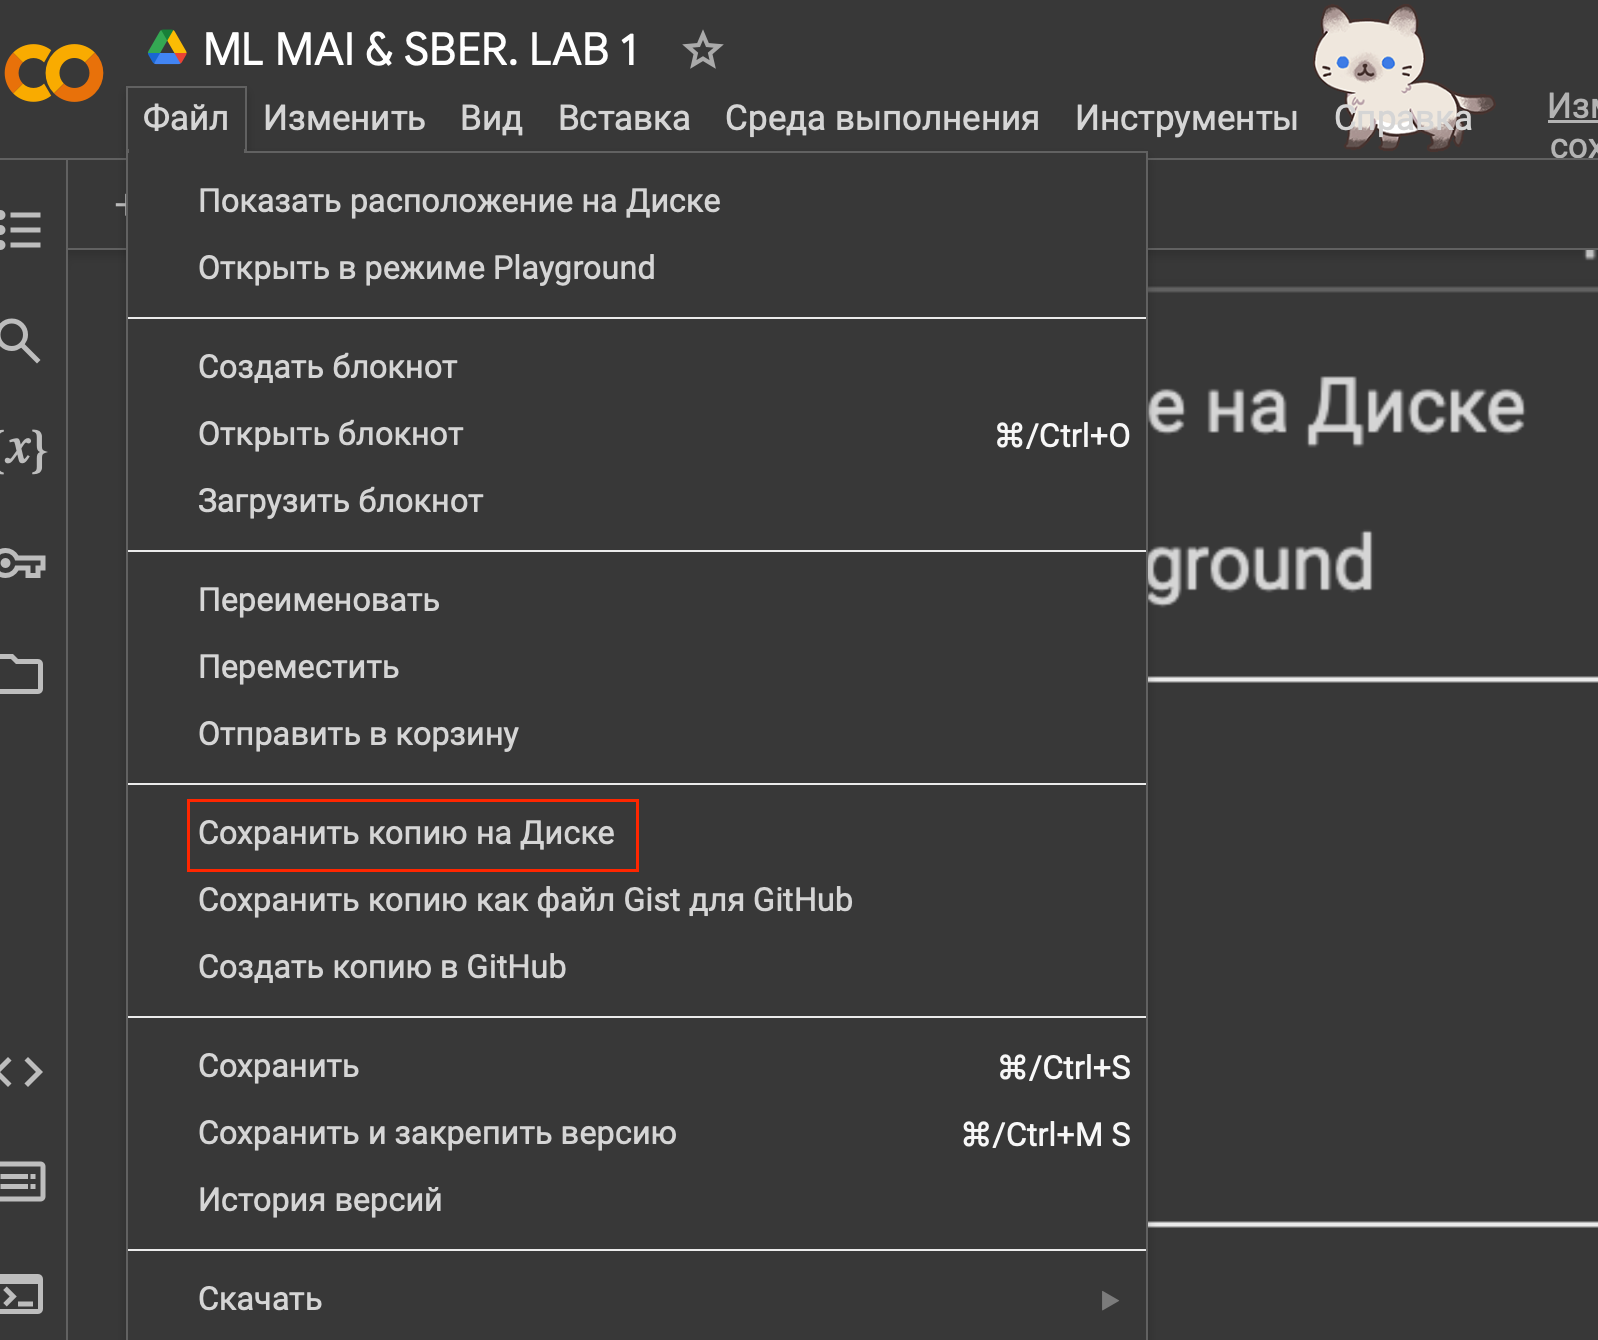

2. у Вас откроется файл в новой вкладке с названием "Копия...". После описания задания вы пишите решение этого задания.

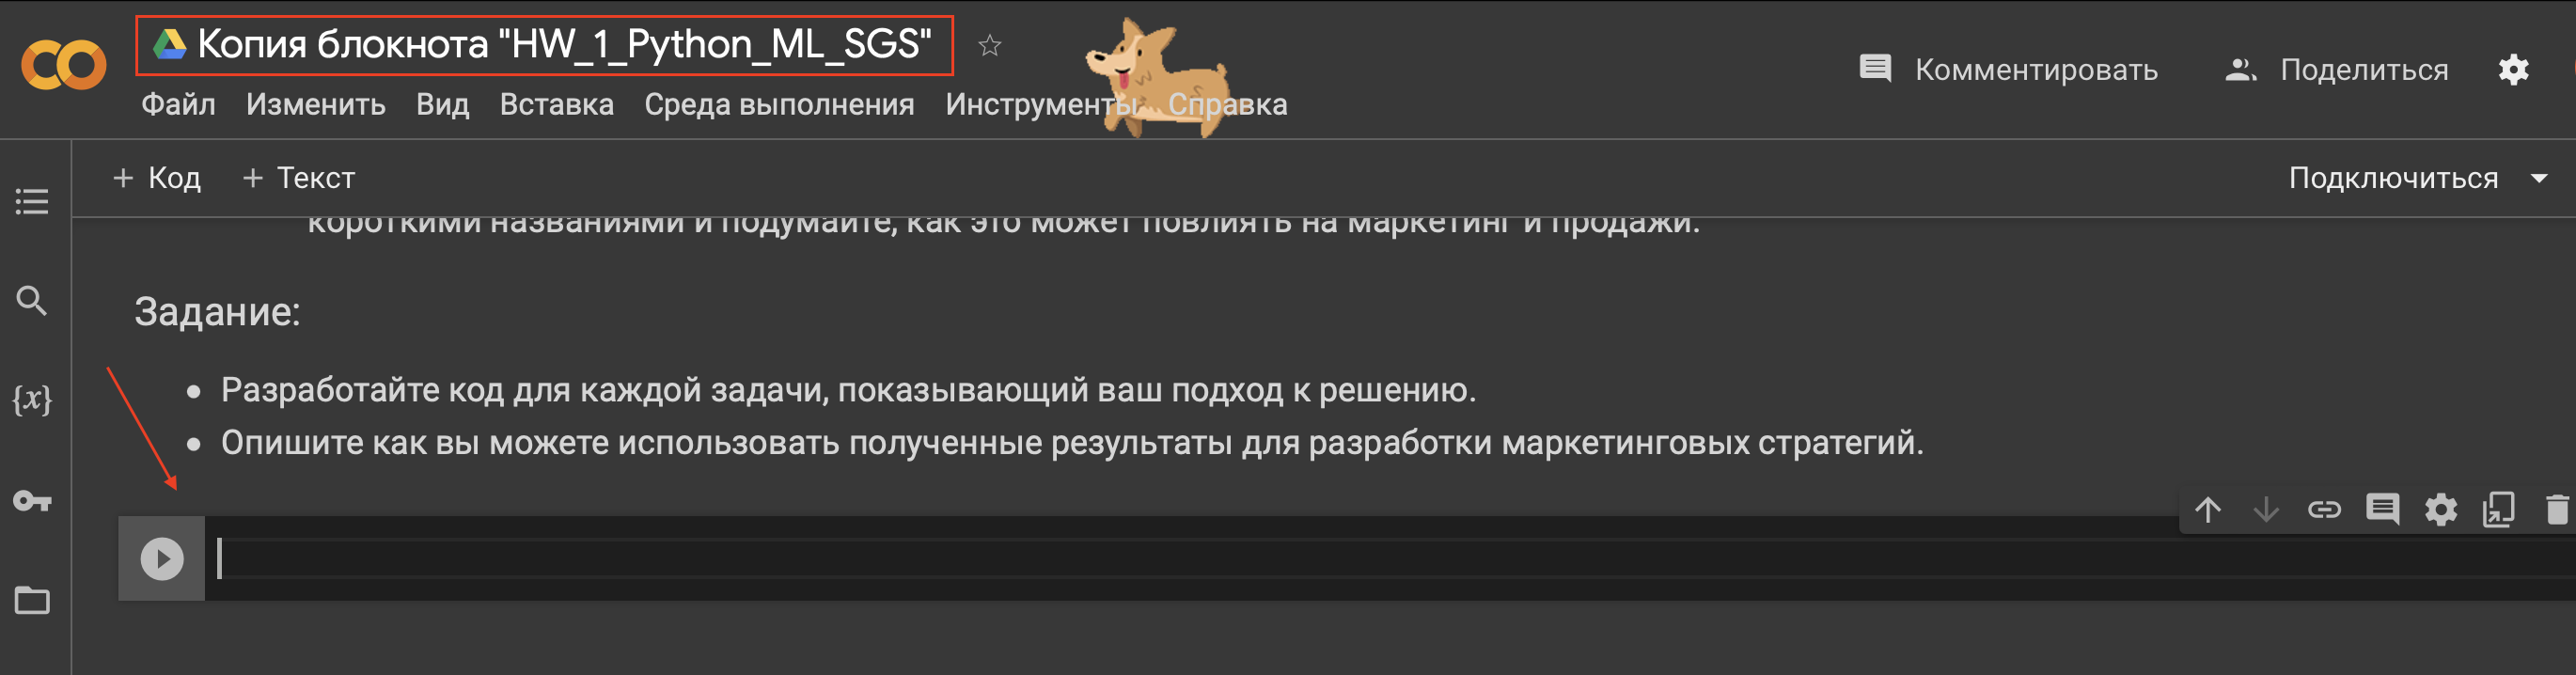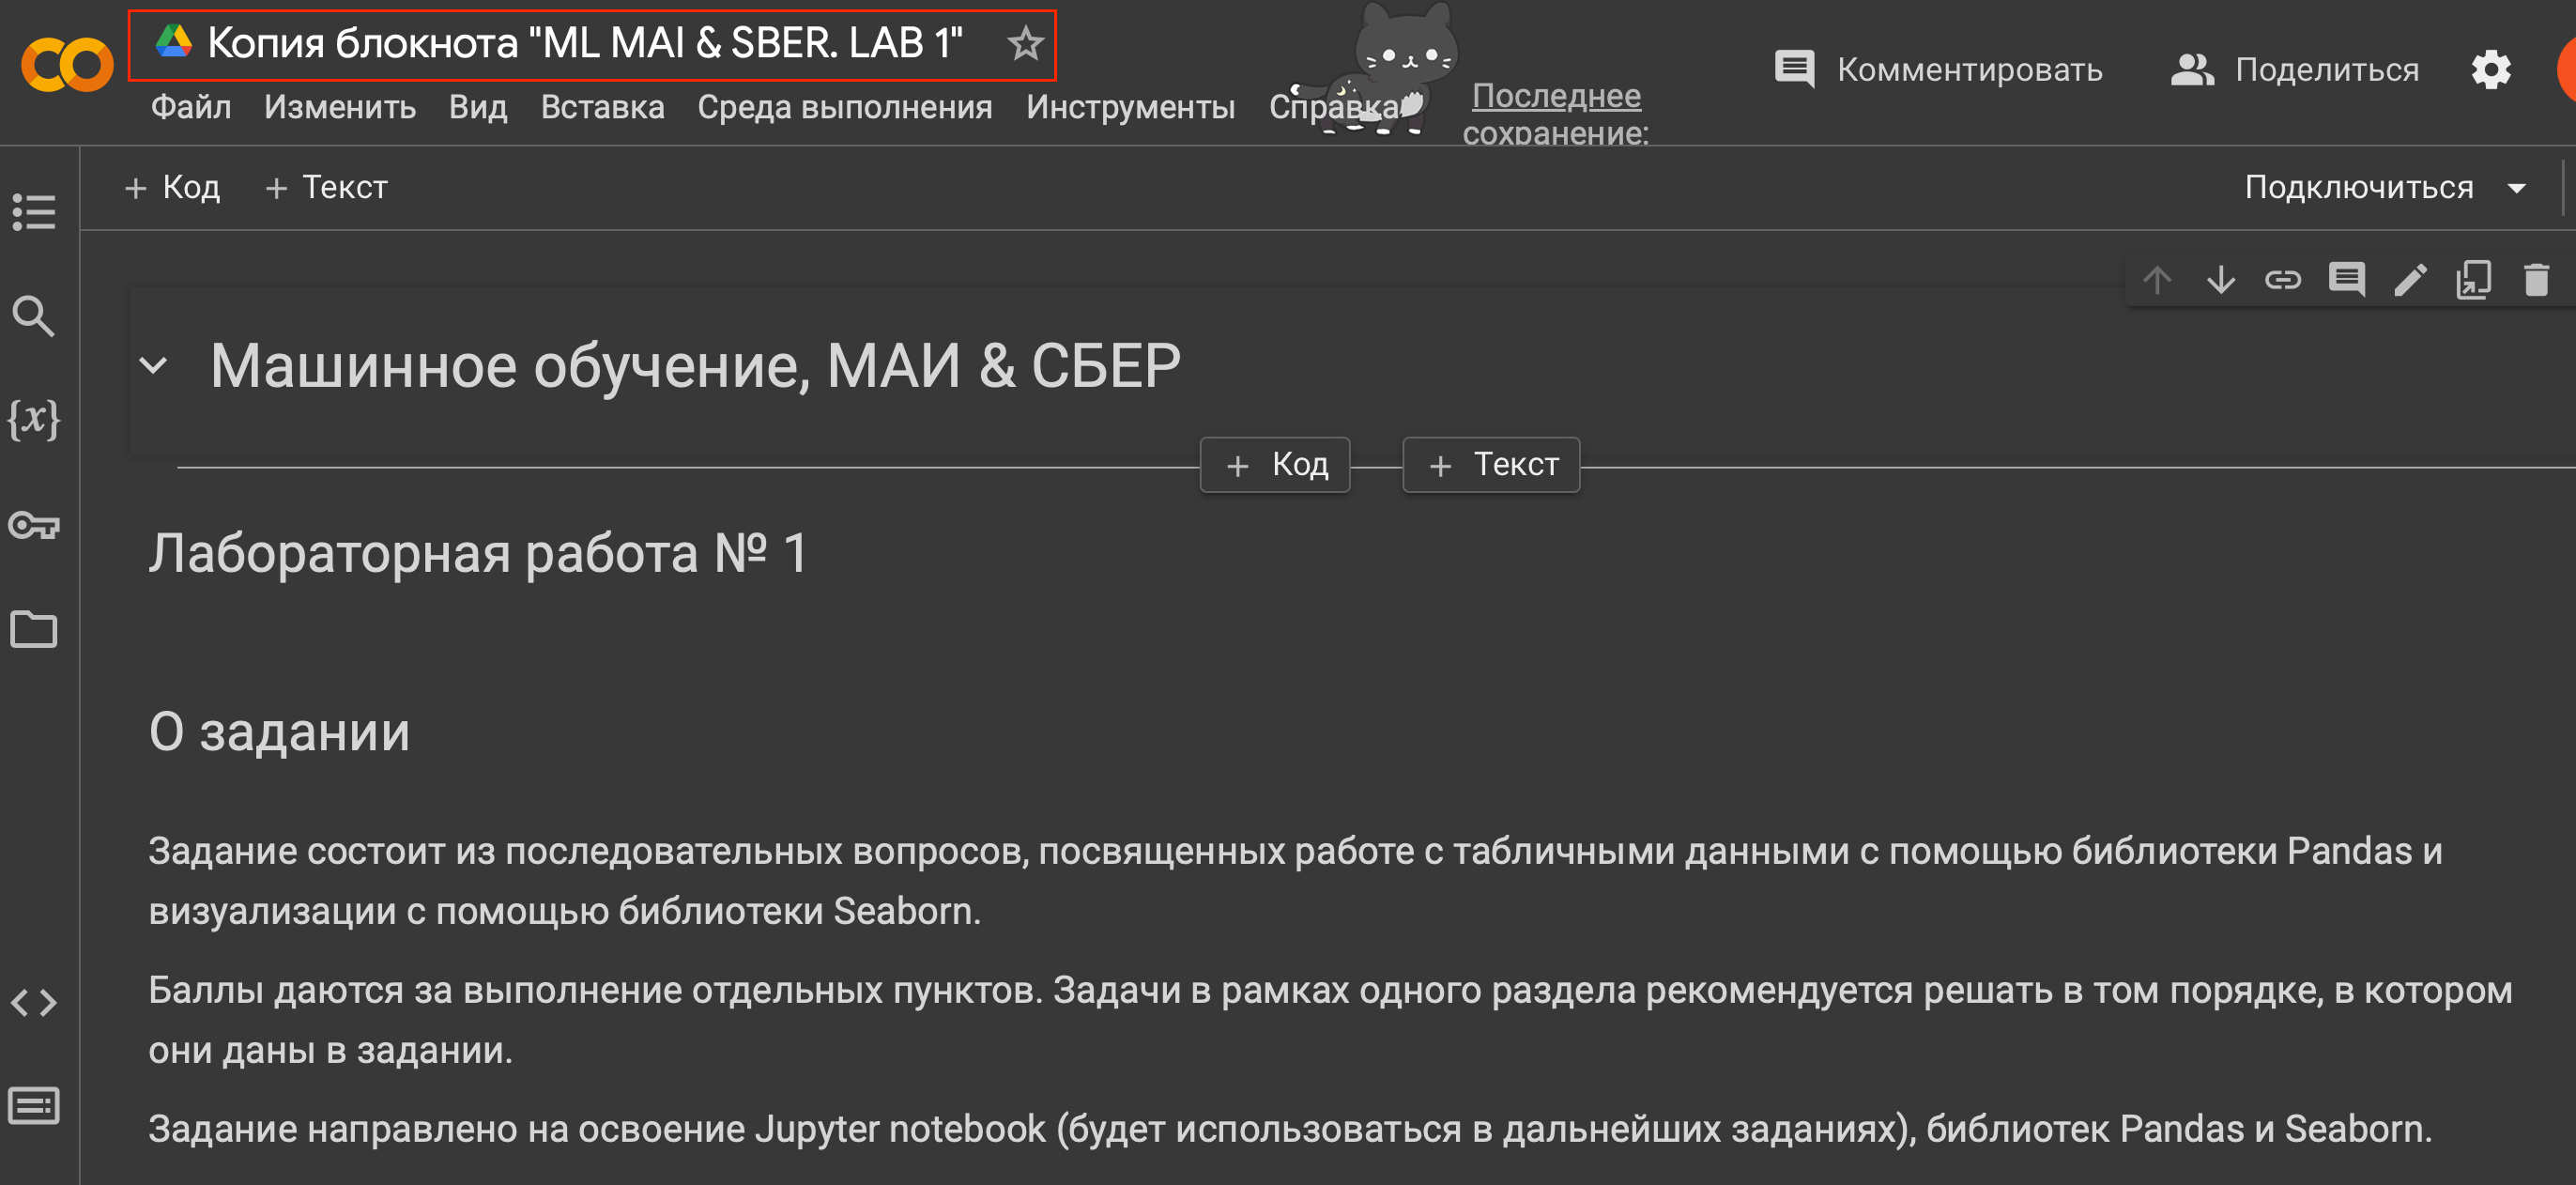

3. После выполнения домашнего задания нажмите кнопку "поделиться" и перейдите в режим доступно всем по ссылке

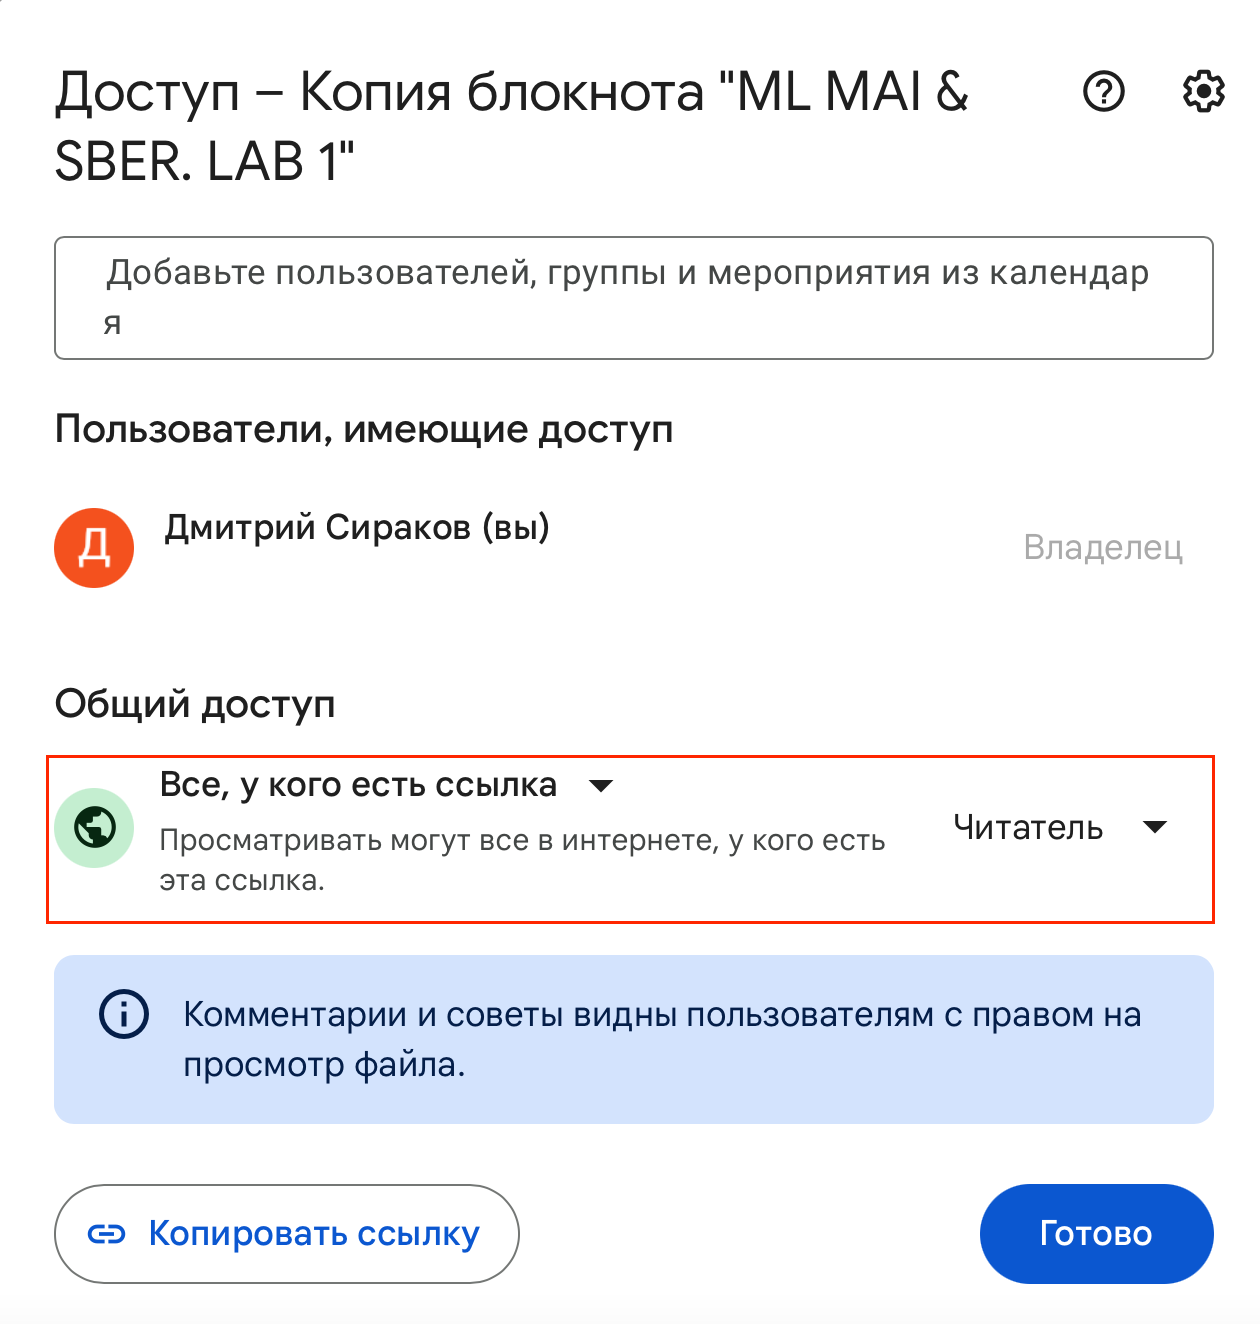

4. Загрузите эту ссылку в lms.mai.ru по курсу "Машинное обучение" в качестве ссылки в раздел "Pandas - работа с таблицами для машинного обучения (ЛР) [17.02]"


В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [1]:
!pip install folium

In [2]:
pip install --upgrade bagpy

     ------------------------------------ 133.6/133.6 kB 527.3 kB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.3
    Uninstalling Jinja2-3.1.3:
      Successfully uninstalled Jinja2-3.1.3
Note: you may need to restart the kernel to use updated packages.


In [1]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

# Задание

## Часть 0. Подготовка [+0.5 балла]

**Задание 1 [+0.5 балла]**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
data = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/TaxiData/train.csv')
data

id  vendor_id      pickup_datetime     dropoff_datetime  \
0        id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1        id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2        id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3        id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4        id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   
...            ...        ...                  ...                  ...   
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
0                      1        -73.982155        40.767937   
1                      1        -73.980415        40.738564   
2                      1        -73.979027        40.763939   
3                      1        -74.010040        40.719971   
4                      1        -73.973053        40.793209   
...                  ...               ...              ...   
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
0               -73.964630         40.765602                  N            455  
1               -73.999481         40.731152                  N            663  
2               -74.005333         40.710087                  N           2124  
3               -74.012268         40.706718                  N            429  
4               -73.972923         40.782520                  N            435  
...                    ...               ...                ...            ...  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198  

[1458644 rows x 11 columns]

In [4]:
test = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/TaxiData/test.csv')
test

id  vendor_id      pickup_datetime  passenger_count  \
0       id3004672          1  2016-06-30 23:59:58                1   
1       id3505355          1  2016-06-30 23:59:53                1   
2       id1217141          1  2016-06-30 23:59:47                1   
3       id2150126          2  2016-06-30 23:59:41                1   
4       id1598245          1  2016-06-30 23:59:33                1   
...           ...        ...                  ...              ...   
625129  id3008929          1  2016-01-01 00:02:52                1   
625130  id3700764          1  2016-01-01 00:01:52                1   
625131  id2568735          1  2016-01-01 00:01:24                2   
625132  id1384355          1  2016-01-01 00:00:28                1   
625133  id0621643          2  2016-01-01 00:00:22                2   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.988129        40.732029         -73.990173   
1             -73.964203        40.679993         -73.959808   
2             -73.997437        40.737583         -73.986160   
3             -73.956070        40.771900         -73.986427   
4             -73.970215        40.761475         -73.961510   
...                  ...              ...                ...   
625129        -74.003464        40.725105         -74.001251   
625130        -74.006363        40.743782         -73.953407   
625131        -73.972267        40.759865         -73.876602   
625132        -73.976501        40.733562         -73.854263   
625133        -73.981850        40.716881         -73.969330   

        dropoff_latitude store_and_fwd_flag  
0              40.756680                  N  
1              40.655403                  N  
2              40.729523                  N  
3              40.730469                  N  
4              40.755890                  N  
...                  ...                ...  
625129         40.733643                  N  
625130         40.782467                  N  
625131         40.748665                  N  
625132         40.891788                  N  
625133         40.769379                  N  

[625134 rows x 9 columns]

In [5]:
submission = pd.read_csv(r'C:/Users/sasha/Desktop/JUPYTER/Datasets/TaxiData/sample_submission.csv')
submission

id  trip_duration
0       id3004672            959
1       id3505355            959
2       id1217141            959
3       id2150126            959
4       id1598245            959
...           ...            ...
625129  id3008929            959
625130  id3700764            959
625131  id2568735            959
625132  id1384355            959
625133  id0621643            959

[625134 rows x 2 columns]

В колонке `dropoff_datetime` содержится информация о времени окончания поездки, однако эта колонка присутствует только в обучающей выборке и отсутствует в тестовой. Это создаёт проблему, так как при обучении модели мы не сможем использовать эту колонку для предсказаний на новых данных. В связи с этим, чтобы избежать ошибок и упростить анализ, рекомендуется удалить колонку `dropoff_datetime` из датасета.

Колонка `pickup_datetime` содержит дату и время начала поездки в формате строки, что затрудняет выполнение операций с датами и временем, таких как вычисление продолжительности поездки или анализ зависимости цены от времени суток. Преобразование этих данных в `datetime`-объекты позволит использовать методы для работы с датой (вместо огромного количества строк для решения какой-нибудь маленькой подзадачи будет использоваться один вызов метода)

In [6]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data.drop(['dropoff_datetime'], axis=1, inplace= True)

In [7]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [8]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  
0               40.765602                  N            455  
1               40.731152                  N            663  
2               40.710087                  N           2124  
3               40.706718                  N            429  
4               40.782520                  N            435  
...                   ...                ...            ...  
1458639         40.740170                  N            778  
1458640         40.796547                  N            655  
1458641         40.707371                  N            764  
1458642         40.757107                  N            373  
1458643         40.790585                  N            198  

[1458644 rows x 10 columns]

В колонке `trip_duration` содержится значение, которое мы стремимся предсказать. Давайте изучим распределение целевой переменной в обучающем наборе данных. Для этого построим гистограмму этой переменной.

Построение гистограммы целевой переменной важно по нескольким причинам:

1. **Понимание распределения**: Гистограмма помогает нам увидеть, как распределены значения целевой переменной. Это может дать представление о том, является ли распределение нормальным, скошенным или имеет выбросы.

2. **Выявление аномалий**: При анализе гистограммы мы можем обнаружить аномальные значения или выбросы, которые могут повлиять на качество модели.

3. **Выбор подходящего алгоритма**: Понимание распределения целевой переменной может помочь в выборе наиболее правильного анализа датасета. Например, если данные сильно скошены, может потребоваться преобразование данных перед обучением модели. (как на практическом занятии, если у нас таргет расположен по экспоненте, то было бы классно предсказывать логарифм, а не экспоненту (подробнее было на лекции))


Text(0.5, 1.0, 'Распределение времени поездок на такси')

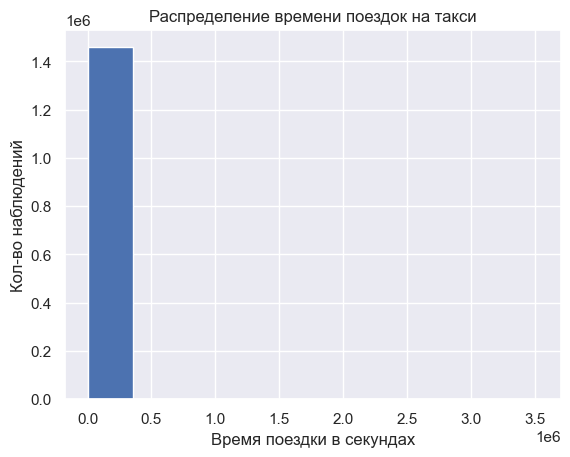

In [9]:
plt.hist(data['trip_duration'])
plt.xlabel('Время поездки в секундах')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

In [10]:
data['trip_duration'].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

Видим, что строится неинформативная гистограмма, очевидно из-за наличия выбросов в данных. Построим гистограмму только на тех данных, которые не превосходят 99 квантиль. 

In [11]:
data['trip_duration'].quantile(0.999)

85128.35700000008

In [12]:
quantile_99 = data['trip_duration'].quantile(0.99)

In [13]:
popular_duration = data['trip_duration'].loc[data['trip_duration'] < quantile_99]

Text(0.5, 1.0, 'Распределение времени поездок на такси')

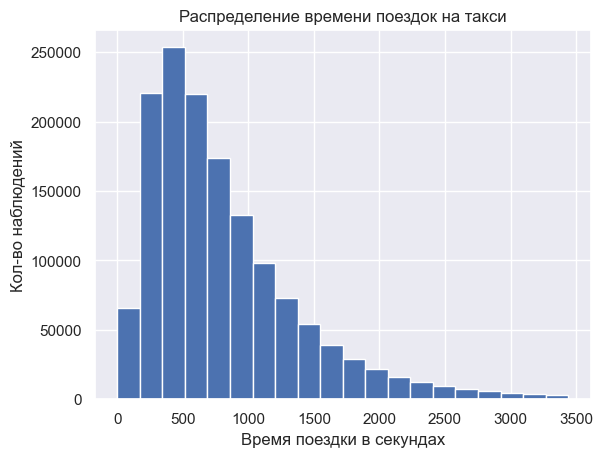

In [14]:
plt.hist(popular_duration, bins= 20)
plt.xlabel('Время поездки в секундах')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

Теперь гистограмма стала более информативной. Наше распределение очень напоминает логнормальное. Можно попробовать построить гистограмму по логорифмированным данным

Text(0.5, 1.0, 'Распределение времени поездок на такси')

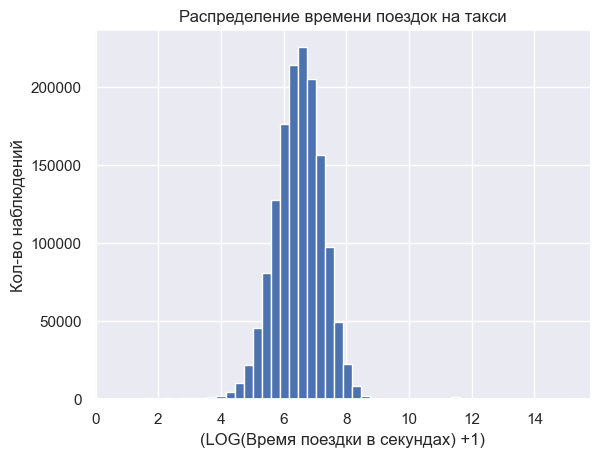

In [15]:
plt.hist(np.log(data['trip_duration'] + 1), bins=50)
plt.xlabel('(LOG(Время поездки в секундах) +1)')
plt.ylabel('Кол-во наблюдений')
plt.title('Распределение времени поездок на такси')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

Наша целевая переменная имеет выбросы, значительно удаленные от основной массы данных. Притом, оставив лишь данные, вероятность которых 99 процентов, мы получаем вполне репрезентативную гистограмму. Распределение продолжительности поездок имеет тяжелые хвосты, т.е значительное количество примеров отдалены от наиболее распространенных наблюдений. Распределение явлвется логнормальным, что мы доказали, когда построили гистограмму прологорифмированных данных и получили колоколообразное распределение, близкое к нормальному. Выбросы, вероятно, обусловлены человеческим фактором водителя. Скорее всего водитель совершил последнюю поездку перед концом смены и забыл ее завершить сразу, а завершил лишь на следующий день утром. А один вообще не выключал таймер 3.5 миллиона секунд, то есть 40 дней))). А еще в 0.1 процент попадают наблюдения, когда поездка длится где-то 90 000 секунд, т.е сутки. Это может навести на мысль, что водители работают сутки через сутки, т.е водитель забыл выключить в конце смены и выключил в начале следующей. Но это недостоверная информация. 

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ:**\
**1)** С точки зрения прикладной ценности предсказания времени поездки:
    RMSLE штрафует за занижение оценок больше, чем за завышение. Как это свойство может сыграть нам на руку? Вот так. Таксисту хотелось бы знать приблизительное время поездки. В этом случае ему лучше давать верхнюю границу, чем нижнюю, ведь если он согласился совершить долгую поездку, то его вряд ли огорчит, что она вышла короче. А если мы предскажем ему короткую по времени поездку, а на деле она окажется длиннее, то это может быть проблемой.

**2)** Также штраф RMSLE зависит от того, насколько ошибка пропорциональна значениям, на которых была совершена ошибка. То есть лосс от ошибки в 10 единиц между предсказанием 40 и таргетом 30 будет примерно равен лоссу в 1000 между предсказанием в 4000 и таргетом 3000. Потому что и в первом и во втором случае ошибка имеет одинаковый масштаб относительно предсказания и таргета. RMSE в этом случае штрафовала бы намного сильнее на ошибке между 4000 и 3000. Короче - RMSLE штрафует слабо, если модель правильно определила порядок таргета. Время поездки в секундах - большая цифра, поэтому такое свойство сыграет нам на руку при предсказаниях.

**3)** Как мы уже видели выше, после логарифмирования выбросы нашего распределения смягчились. Это обьясняет то, что RMSLE не сильно чувствительна к выбросам. Логарифм сближает отдаленные от начала координат значения и растаскивает значения, близкие к началу координат.

Мы изучили несколько вариантов линейной регрессии в sklearn, но все они минимизировали среднеквадратичную ошибку (MSE), а не среднеквадратичную логарифмическую ошибку (RMSLE). Для работы с RMSLE мы можем использовать следующий подход: вместо прямого предсказания целевой переменной, мы будем предсказывать ее логарифм. Пусть $\hat{y}_i = \log{(y_i + 1)}$ будет модифицированной целевой переменной, а $\hat{a}(x_i)$ — предсказание модели, обученной на $\hat{y}_i$. Чтобы получить исходное предсказание, мы используем обратное преобразование: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

\

Это преобразование позволяет нам оптимизировать MSE для логарифмированных значений, что эквивалентно оптимизации RMSLE для исходных значений. Это связано с тем, что минимизация квадратичной ошибки между логарифмами прогнозов и реальных значений соответствует минимизации логарифмической ошибки между самими прогнозами и реальными значениями ***(для дополнительного балла можете доказать почему)***. Таким образом, этот подход позволяет использовать стандартные методы линейной регрессии для задач, где требуется минимизировать RMSLE.






Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

***(Какая константа прекрасно оптимизирует RMSLE MSE (с преобразованиями?))***

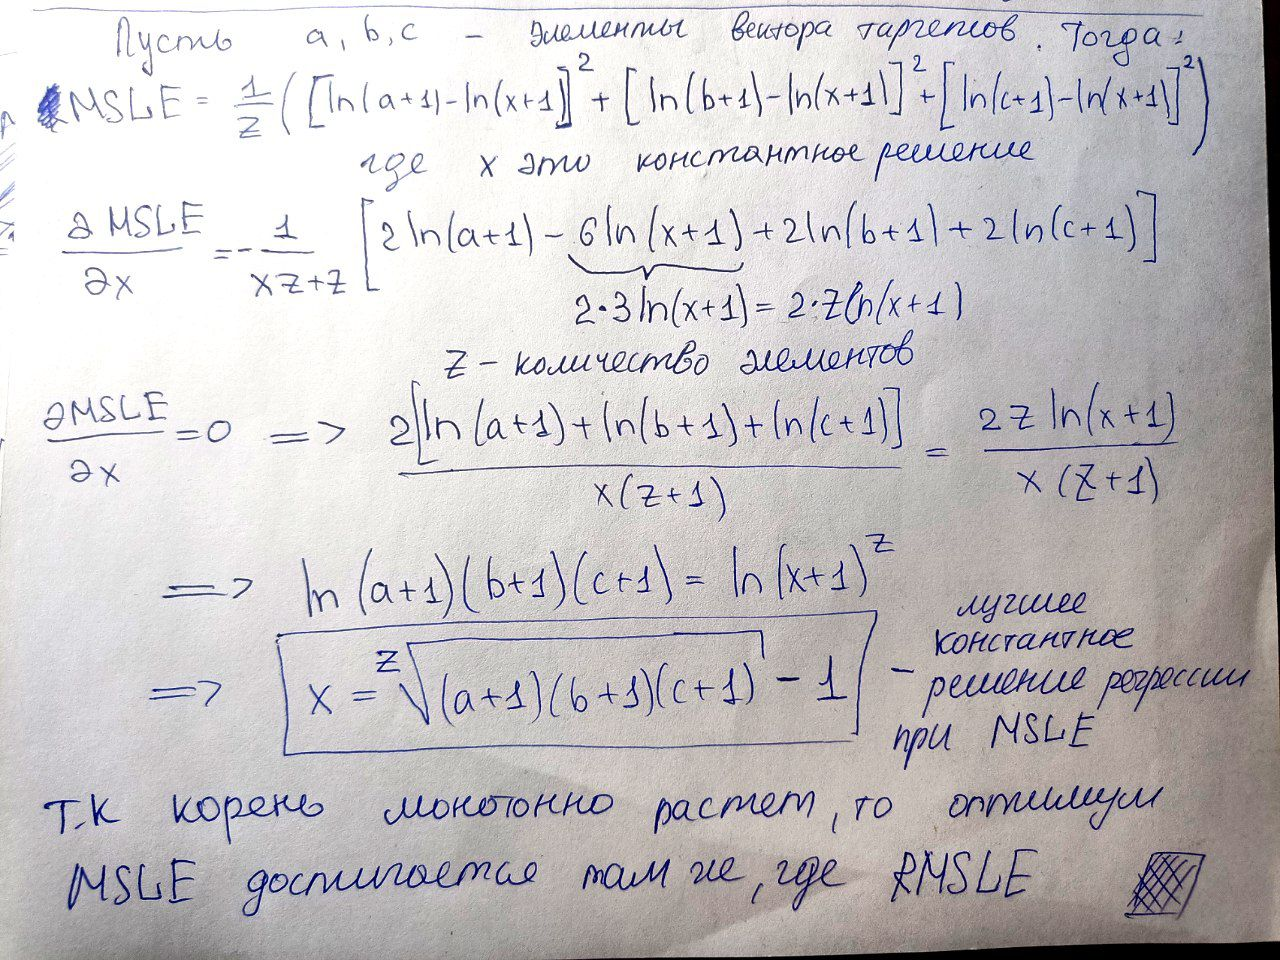

In [16]:
from IPython.display import Image
Image(filename='RMSLE.jpg', width= 700, height= 550)

In [17]:
def rmsle(log1p_y_true, log1p_y_pred):
    #╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ
    pass

rmsle_best_const = ... # как вычислить ее?
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4) # ответ конечно же нельзя подсматривать

Ellipsis


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## Часть 1. Изучаем `pickup_datetime` & Обучаем модель [+1 балл]


In [ ]:
data

**Задание 2 [+0.125 балла]**. Для начала давайте проанализируем общее количество поездок по дням. Построим график, отражающий зависимость числа поездок от конкретного дня в году (например, можно использовать `sns.countplot`).

Просмотр этой информации важен по нескольким причинам:

1. **Выявление закономерностей**: Анализ количества поездок по дням может помочь выявить определенные закономерности или тренды, например, повышенный спрос в выходные дни или праздничные периоды.

2. **Обнаружение аномалий**: График может помочь идентифицировать дни с необычно высоким или низким количеством поездок, что может указывать на наличие аномалий или особых событий.

3. **Корректировка моделей**: Если анализ показывает, что спрос сильно колеблется в зависимости от дня, это может потребовать учета этого фактора в моделях прогнозирования.

In [22]:
data['pickup_datetime'].dt.date
data['pickup_date'] = data['pickup_datetime'].dt.date

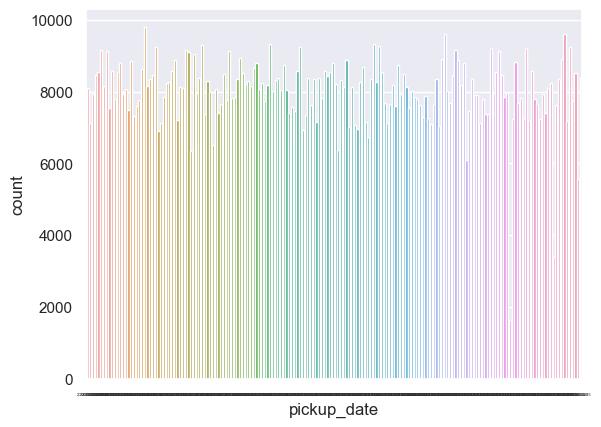

In [23]:
sns.countplot(data = data, x = 'pickup_date')
plt.xticks(fontsize=3)
plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [24]:
data.groupby('pickup_date').size().sort_values(ascending= True)

pickup_date
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
              ... 
2016-02-13    9309
2016-04-02    9325
2016-03-05    9597
2016-04-16    9602
2016-04-09    9796
Length: 182, dtype: int64

**23-24 января 2016 года, власти Нью-Йорка запретили автомобильное движение из-за сильной снежной бури**

In [25]:
data['log_duration'] = np.log(data['trip_duration'] + 1)
data['pickup_date'] = pd.to_datetime(data['pickup_date'])
data['Hour'] = data['pickup_datetime'].dt.hour
data['Day'] = data['pickup_datetime'].dt.weekday
data['Month'] = data['pickup_datetime'].dt.month
data['Day_of_year'] = data['pickup_datetime'].dt.dayofyear
data['anomaly_day'] = np.where((data['pickup_date'] == '2016-01-23') | (data['pickup_date'] == '2016-01-24'), 1, 0 )

Text(0, 0.5, 'Amount of drives')

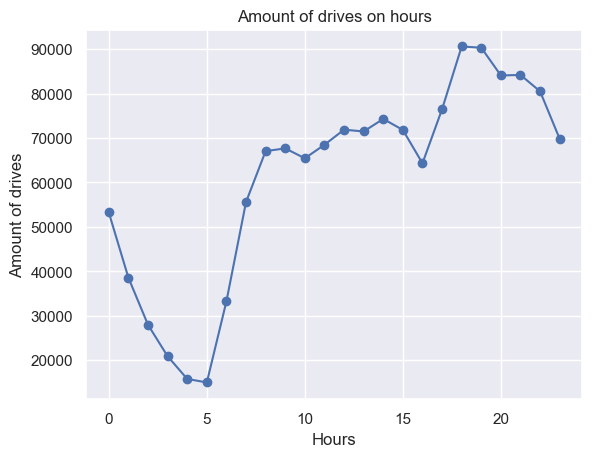

In [26]:
hours_drives = data.groupby('Hour').size()
hours_drives = pd.Series(hours_drives)
plt.plot(hours_drives.index, hours_drives.values, marker='o')
plt.title('Amount of drives on hours')
plt.xlabel('Hours')
plt.ylabel('Amount of drives')

Text(0, 0.5, 'Amount of drives')

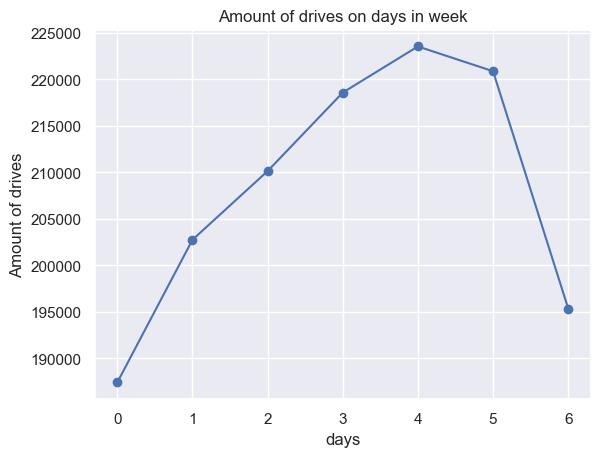

In [27]:
weekday_drives = data.groupby('Day').size()
plt.plot(weekday_drives.index, weekday_drives.values, marker = 'o')
plt.title('Amount of drives on days in week')
plt.xlabel('days')
plt.ylabel('Amount of drives')

**Задание 3 [+0.25 балла]**. Постройте график, на котором будет отображена зависимость числа поездок от времени суток для различных месяцев. Используйте разные цвета для кривых, соответствующих разным месяцам, с помощью параметра `hue` в `sns.relplot`. Аналогичным образом постройте график, показывающий зависимость количества поездок от часа в сутках для разных дней недели.

Это важно по нескольким причинам:

1. **Выявление временных закономерностей**: Графики помогут увидеть, как спрос на поездки меняется в течение суток в разные месяцы и дни недели. Это может выявить определенные тренды, например, пиковые часы поездок или временные периоды с низким спросом.

2. **Адаптация к сезонности и недельным циклам**: Понимание того, как спрос на поездки меняется в зависимости от времени года и дня недели, позволяет адаптировать модель машинного обучения и сделать правильный feature-engineering (правильную предобработку данных)




In [28]:
month_hour_grouped = data.groupby(['Month', 'Hour']).size().reset_index(name='Count')
month_hour_grouped

Month  Hour  Count
0        1     0   8330
1        1     1   6400
2        1     2   4830
3        1     3   3574
4        1     4   2612
..     ...   ...    ...
139      6    19  14187
140      6    20  12799
141      6    21  13740
142      6    22  13391
143      6    23  11899

[144 rows x 3 columns]

Text(44.96975000000002, 0.5, 'Amount of drives')

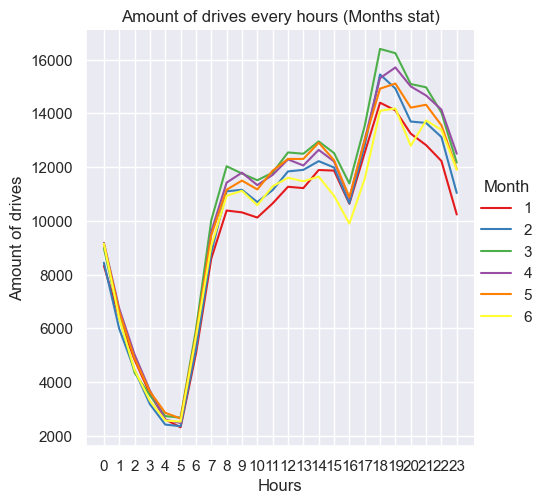

In [29]:
sns.relplot(data = month_hour_grouped, x = 'Hour', y = 'Count', hue = 'Month', kind = 'line', palette="Set1")
plt.title('Amount of drives every hours (Months stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Amount of drives')

In [30]:
day_hour_grouped = data.groupby(['Day', 'Hour']).size().reset_index(name = 'Count')
day_hour_grouped

Day  Hour  Count
0      0     0   4299
1      0     1   2578
2      0     2   1658
3      0     3   1226
4      0     4   1351
..   ...   ...    ...
163    6    19  10046
164    6    20   9136
165    6    21   8737
166    6    22   7892
167    6    23   6367

[168 rows x 3 columns]

Text(44.96975000000002, 0.5, 'Amount of drives')

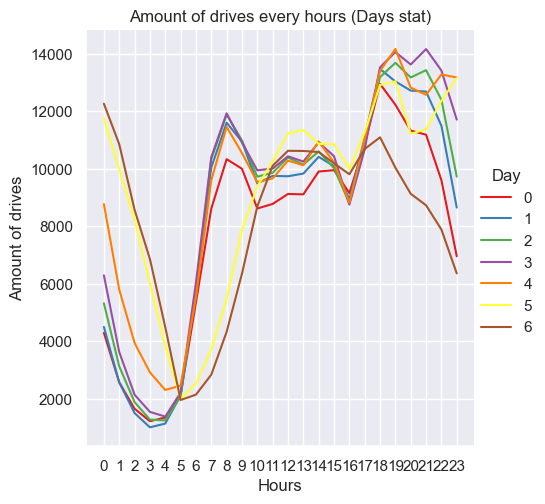

In [31]:
sns.relplot(data = day_hour_grouped, x = 'Hour', y = 'Count', hue= 'Day', kind = 'line', palette= 'Set1')
plt.title('Amount of drives every hours (Days stat)')
plt.xticks(range(24))
plt.xlabel('Hours')
plt.ylabel('Amount of drives')

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это может быть связано?

**Ответ:**\
**Первый график** отображает количество поездок в течение дня от месяца к месяцу. С февраля по май количество вызовов такси находится примерно в одной поре. Самые низкие графики - в январе и июне, поскольку в январе часть людей на новогодних и рождественских выходных, а в июне люди берут отпуска.\
Самый высокий же график - это график марта, когда люди активизируются и, например, чаще задерживаются на работе. Это можно обьяснить тем, что март - месяц квартальной отчетности за первый квартал.\
В первой половине дня люди заказывают такси к 8 утра наверняка потому что им на работу к 9.  Следующий пик вызовов происходит около 14-00, когда наступает время обеденного перерыва. Рабочий день длится 8 часов, т.е с 9 до 18, учитывая обеденный час. В промежутке между началом и концом рабочего дня люди также совершают значительное количество поездок, возможно, по рабочим делам, но в 16-00 наступает минимум поездок. Видимо перед концом рабочего дня нужно выполнить какую-либо отчетность по проведенной работе, поэтому ехать никуда не нужно.\
Во второй половине дня максимальное количество заказов послупает в 18-00 в конце рабочего дня - все едут домой. После чего количество вызовов идет на спад и достигает глобального минимума к пяти утра.\
После этого количество вызовов постепенно растет до первого максимума - времени ехать на работу. И т. д.\

**Второй график** отображает почасовое количество поездок в разные дни недели. Особеные дни - пятница, суббота и воскресенье. В эти дни максимальное количество ночных вызовов. В пятницу вечером люди празднуют конец рабочей недели, поэтому после полуночи возвращаются домой - т.е ночью в субботу. Аналогично в субботу люди планируют вечерние мероприятия и возвращаются домой после полуночи - ночью в воскресенье. В субботу и воскресенье также минимальное количество утренних вызовов. А вот днем, с 12 до 15 люди едут по своим делам - в магазины, на отдых, на мероприятия. Разница в том, что в субботу люди могут позволить себе вернуться домой поздно, а в воскресенье вечерний пик вызовов, когда все едут домой, наступает в 18-00, после чего стремительно падает.\
В рабочие дни все подчиняется законам, описанным к прошлому графику. Люди едут на работу к 9, вызывая такси к 8 утра, затем едут на обед в 14 часов. Под конец рабочего дня заканчивают свои дела и никуда не едут, а ближе к 18 часам вызывают такси домой.\
Второй график помогает сделать интересное наблюдение. В понедельник люди раньше всего уезжают с работы, а в последующие дни все чаще и чаще задерживаются, причем с каждым днем на более долгий срок. Больше всего - в четверг. Видимо в понедельник люди еще не успевают войти в ритм после выходных, а в четверг стремятся доделать все дела, чтобы уйти пораньше в пятницу.

**Задание 4 [+0.25 балла]**. Разделите данные на обучающую и тестовую выборки в соотношении 80:20 с помощью функции `train_test_split` из библиотеки `sklearn`. На основе обучающей выборки постройте график, показывающий зависимость логарифма среднего времени поездки от дня недели. Повторите этот процесс для часа в сутках и дня в году.

Посмотреть график распределения тренировочной выборки важно по нескольким причинам:

1. **Понимание данных**: Анализ тренировочной выборки помогает лучше понять распределение и характеристики данных, что важно для выбора и настройки моделей машинного обучения

2. **Выявление закономерностей**: Графики зависимостей могут выявить важные закономерности и тренды в данных, которые могут быть использованы для улучшения моделей прогнозирования.

3. **Избежание переобучения**: Анализируя только тренировочную выборку, мы избегаем риска "заглядывания в будущее" и переобучения модели, когда она слишком хорошо подгоняется под тестовые данные.


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, data['trip_duration'], train_size= 0.8)

In [34]:
mean_duration_per_day= X_train.groupby('Day').agg({'trip_duration': 'mean'}).reset_index()
mean_duration_per_day['log(trip_duration)'] = np.log(mean_duration_per_day['trip_duration'])

In [35]:
mean_duration_per_day

Day  trip_duration  log(trip_duration)
0    0     896.721567            6.798745
1    1     983.376550            6.890992
2    2     978.136487            6.885649
3    3    1008.218853            6.915941
4    4     987.835168            6.895516
5    5     934.282231            6.839779
6    6     910.410898            6.813896

In [36]:
mean_duration_per_hour = X_train.groupby('Hour').agg({'trip_duration': 'mean'}).reset_index()
mean_duration_per_hour['log(trip_duration)'] = np.log(mean_duration_per_hour['trip_duration'])

In [37]:
mean_duration_per_hour

Hour  trip_duration  log(trip_duration)
0      0     940.175386            6.846066
1      1     901.474134            6.804031
2      2     905.240910            6.808201
3      3     888.237987            6.789240
4      4     942.260024            6.848281
5      5     819.764230            6.709017
6      6     808.447232            6.695115
7      7     834.832948            6.727232
8      8     919.352959            6.823670
9      9     927.538135            6.832534
10    10     934.929217            6.840471
11    11     963.034155            6.870089
12    12     987.691278            6.895370
13    13    1028.935352            6.936280
14    14    1081.626570            6.986221
15    15    1127.484949            7.027745
16    16    1086.607086            6.990815
17    17    1040.328276            6.947292
18    18     988.169694            6.895854
19    19     894.473439            6.796235
20    20     881.730749            6.781887
21    21     886.545287            6.787332
22    22     983.125375            6.890737
23    23     918.801646            6.823070

In [38]:
mean_duration_per_yearday = X_train.groupby('Day_of_year').agg({'trip_duration': 'mean'}).reset_index()
mean_duration_per_yearday['log(trip_duration)'] = np.log(mean_duration_per_yearday['trip_duration'])

In [39]:
mean_duration_per_yearday

Day_of_year  trip_duration  log(trip_duration)
0              1     907.361923            6.810541
1              2     842.291046            6.736126
2              3     942.893213            6.848953
3              4     842.364620            6.736213
4              5    1611.867568            7.385149
..           ...            ...                 ...
177          178     968.925289            6.876188
178          179     897.135186            6.799207
179          180     992.129944            6.899854
180          181    1013.669911            6.921333
181          182    1048.917570            6.955514

[182 rows x 3 columns]

([<matplotlib.axis.XTick at 0x26a02d6b3d0>,
 [Text(-25.0, 0, '−25'),
  Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

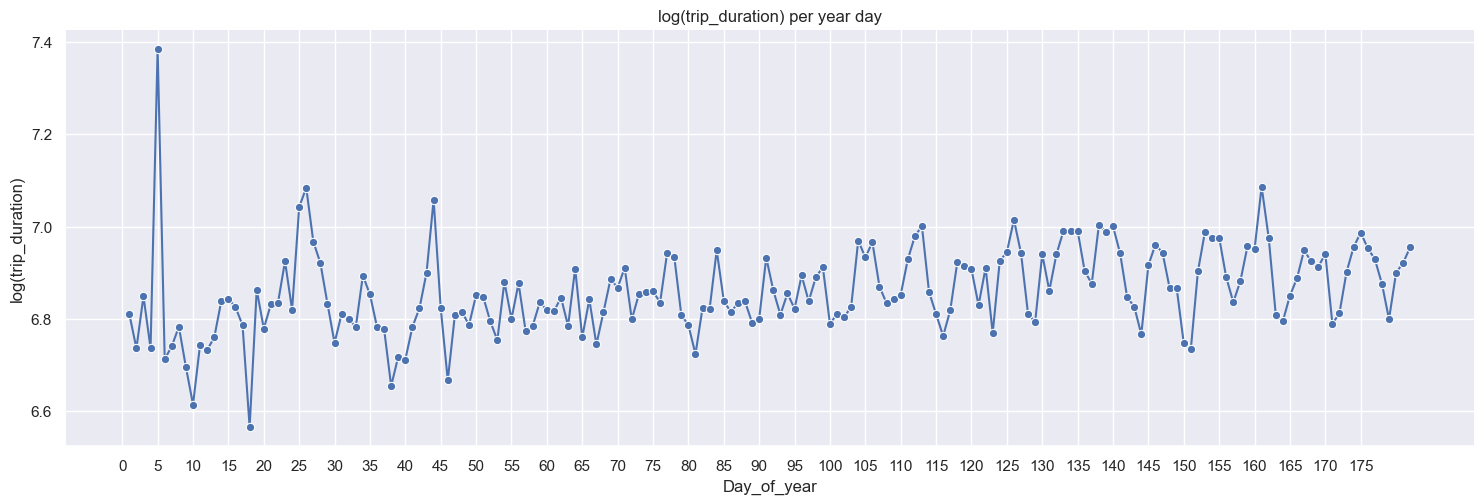

In [40]:
sns.relplot(data = mean_duration_per_yearday, x = 'Day_of_year', y = 'log(trip_duration)', kind = 'line', marker = 'o', aspect= 3 )
plt.title('log(trip_duration) per year day')
plt.xticks(range(0, 180, 5))

Text(0.5, 1.0, 'log(trip_duration) per day')

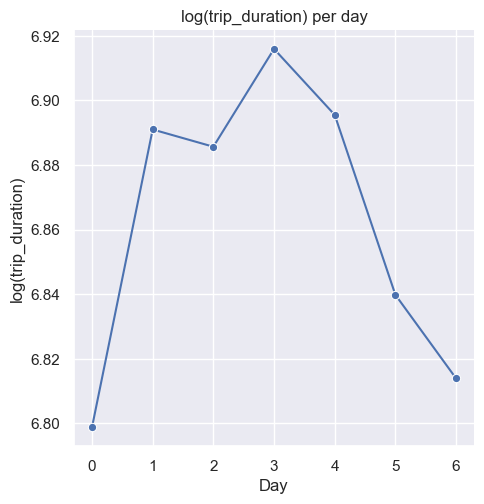

In [41]:
sns.relplot(data = mean_duration_per_day, x = 'Day', y = 'log(trip_duration)', kind = 'line', marker = 'o' )
plt.title('log(trip_duration) per day')

Text(0.5, 1.0, 'log(trip_duration) per hour')

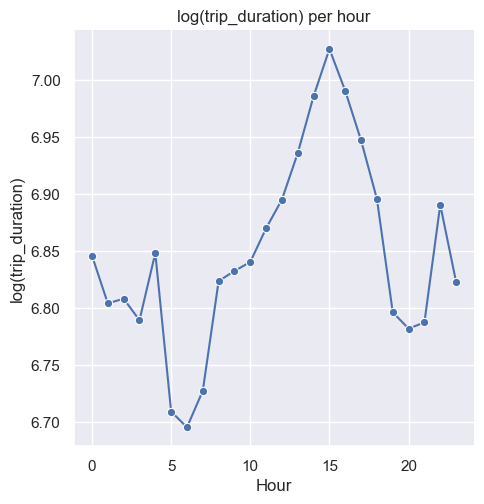

In [42]:
sns.relplot(data = mean_duration_per_hour, x = 'Hour', y = 'log(trip_duration)', kind = 'line', marker = 'o' )
plt.title('log(trip_duration) per hour')
# plt.xticks(range(24))

По графикам можно сделать вывод, что поездки большей продолжительности совершаются в середине дня, а небольшие - ночью, или рано утром. Скорее всего, это обусловлено тем, что в ночное время безопаснее вызвать транспорт из точки А в точку Б, даже если ехать недалеко, и в дневное время человек бы воспользовался общественным транспортом или дошел пешком. Так же длинные поездки на такси совершаются в основном в разгар рабочего дня, нежели в выходные.\
В течение года длинные поездки люди совершали 5-6 января. В 2016 году в этих числах у католиков был большой празник крещение. также пик был 14 февраля. Наверняка люди отправляли друг другу подарки на такси или ездили в гости.\
Ну а около 20 числел января была снежная буря.


Добавьте следующие признаки на основе `pickup_datetime` (не зря мы преобразовывали это в первых этапах):
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

Разбиение даты на отдельные признаки важно по нескольким причинам:

1. **Выявление временных закономерностей**: Разделение даты на день недели, месяц и час помогает выявить закономерности в данных, связанные с временем суток, днями недели и сезонностью.

2. **Улучшение прогностической способности модели**: Добавление этих признаков может улучшить точность моделей машинного обучения, поскольку они могут захватывать важные временные зависимости в данных.

3. **Адаптация к аномальным событиям**: Бинарные признаки, указывающие на аномальные периоды, позволяют модели учитывать особые ситуации, которые могут существенно отличаться от обычных условий.

4. **Повышение интерпретируемости**: Разбиение даты на отдельные компоненты делает модель более интерпретируемой, позволяя легче понять, как различные временные факторы влияют на целевую переменную.

**Вышеперечисленные признаки ранее уже были добавлены**

In [43]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  log_duration  \
0               40.765602                  N            455      6.122493   
1               40.731152                  N            663      6.498282   
2               40.710087                  N           2124      7.661527   
3               40.706718                  N            429      6.063785   
4               40.782520                  N            435      6.077642   
...                   ...                ...            ...           ...   
1458639         40.740170                  N            778      6.658011   
1458640         40.796547                  N            655      6.486161   
1458641         40.707371                  N            764      6.639876   
1458642         40.757107                  N            373      5.924256   
1458643         40.790585                  N            198      5.293305   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  
0        2016-03-14    17    0      3           74            0  
1        2016-06-12     0    6      6          164            0  
2        2016-01-19    11    1      1           19            0  
3        2016-04-06    19    2      4           97            0  
4        2016-03-26    13    5      3           86            0  
...             ...   ...  ...    ...          ...          ...  
1458639  2016-04-08    13    4      4           99            0  
1458640  2016-01-10     7    6      1           10            0  
1458641  2016-04-22     6    4      4          113            0  
1458642  2016-01-05    15    1      1            5            0  
1458643  2016-04-05    14    1      4           96            0  

[1458644 rows x 17 columns]

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Задание 5 [+0.375 балла]**.
Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

Применение `OneHotEncoder` и `StandardScaler` важно по следующим причинам:

1. **OneHotEncoder для категориальных признаков**: Категориальные признаки необходимо преобразовать в числовой формат перед использованием в линейной регрессии. `OneHotEncoder` преобразует категориальные переменные в бинарные векторы, что позволяет модели корректно интерпретировать эти признаки без внесения искажений, связанных с порядком значений.

2. **StandardScaler для численных признаков**: Масштабирование численных признаков с помощью `StandardScaler` помогает стандартизировать данные, приводя их к одному масштабу с нулевым средним и единичным стандартным отклонением. Это улучшает интерпретацию весов линейной модели (а также мы обсудим на лекции, почему это ускоряет обучение модели)


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [45]:
test

id  vendor_id      pickup_datetime  passenger_count  \
0       id3004672          1  2016-06-30 23:59:58                1   
1       id3505355          1  2016-06-30 23:59:53                1   
2       id1217141          1  2016-06-30 23:59:47                1   
3       id2150126          2  2016-06-30 23:59:41                1   
4       id1598245          1  2016-06-30 23:59:33                1   
...           ...        ...                  ...              ...   
625129  id3008929          1  2016-01-01 00:02:52                1   
625130  id3700764          1  2016-01-01 00:01:52                1   
625131  id2568735          1  2016-01-01 00:01:24                2   
625132  id1384355          1  2016-01-01 00:00:28                1   
625133  id0621643          2  2016-01-01 00:00:22                2   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.988129        40.732029         -73.990173   
1             -73.964203        40.679993         -73.959808   
2             -73.997437        40.737583         -73.986160   
3             -73.956070        40.771900         -73.986427   
4             -73.970215        40.761475         -73.961510   
...                  ...              ...                ...   
625129        -74.003464        40.725105         -74.001251   
625130        -74.006363        40.743782         -73.953407   
625131        -73.972267        40.759865         -73.876602   
625132        -73.976501        40.733562         -73.854263   
625133        -73.981850        40.716881         -73.969330   

        dropoff_latitude store_and_fwd_flag  
0              40.756680                  N  
1              40.655403                  N  
2              40.729523                  N  
3              40.730469                  N  
4              40.755890                  N  
...                  ...                ...  
625129         40.733643                  N  
625130         40.782467                  N  
625131         40.748665                  N  
625132         40.891788                  N  
625133         40.769379                  N  

[625134 rows x 9 columns]

In [46]:
numeric_features = ['Hour', 'Day']
categorical_features = ['Month', 'anomaly_day']

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])



pipeline1 = Pipeline(steps=[('preprocessor', preprocessor1),
                           ('regressor', Ridge())])

X = data[['Hour', 'Day', 'Month', 'anomaly_day']]
y = data['log_duration']

pipeline1.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hour', 'Day']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Month', 'anomaly_day'])])),
                ('regressor', Ridge())])

In [47]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'])
test['pickup_date'] = test['pickup_datetime'].dt.date
test['pickup_date'] = pd.to_datetime(test['pickup_date'])
test['Hour'] = test['pickup_datetime'].dt.hour
test['Day'] = test['pickup_datetime'].dt.weekday
test['Month'] = test['pickup_datetime'].dt.month
test['Day_of_year'] = test['pickup_datetime'].dt.dayofyear
test['anomaly_day'] = np.where((test['pickup_date'] == '2016-01-23') | (test['pickup_date'] == '2016-01-24'), 1, 0 )

In [48]:
X_test_real =test[['Hour', 'Day', 'Month', 'anomaly_day']]
X_test_real

Hour  Day  Month  anomaly_day
0         23    3      6            0
1         23    3      6            0
2         23    3      6            0
3         23    3      6            0
4         23    3      6            0
...      ...  ...    ...          ...
625129     0    4      1            0
625130     0    4      1            0
625131     0    4      1            0
625132     0    4      1            0
625133     0    4      1            0

[625134 rows x 4 columns]

In [49]:
submission['log_trip_duration'] = np.log(submission['trip_duration'] + 1)
Y_true = submission['log_trip_duration']
submission

id  trip_duration  log_trip_duration
0       id3004672            959           6.866933
1       id3505355            959           6.866933
2       id1217141            959           6.866933
3       id2150126            959           6.866933
4       id1598245            959           6.866933
...           ...            ...                ...
625129  id3008929            959           6.866933
625130  id3700764            959           6.866933
625131  id2568735            959           6.866933
625132  id1384355            959           6.866933
625133  id0621643            959           6.866933

[625134 rows x 3 columns]

In [50]:
prediction1 = pipeline1.predict(X_test_real)

In [51]:
mse1 = mean_squared_error(Y_true, prediction1)
print("MSE первой модели:", mse1)

MSE первой модели: 0.16262108188326738


## Часть 2. Изучаем координаты & Обучаем модель [+1.5 балла]




Теперь, когда мы подробно изучили временные аспекты данных о поездках, давайте переключим наше внимание на географические данные, а именно на координаты начала и конца поездок. Мы предоставили вам функцию, которая отображает на карте точки начала или конца поездок. Однако обратите внимание, что для эффективности этой функции мы используем только небольшой фрагмент данных, иначе обработка займет слишком много времени.

Анализ координат важен по нескольким причинам:

1. **Пространственный анализ**: Координаты позволяют проводить пространственный анализ, который может выявить географические закономерности в данных, такие как популярные места отправления и назначения, районы с высоким спросом и т. д.

2. **Улучшение точности прогнозов**: Включение географических признаков в модели прогнозирования может повысить их точность, поскольку координаты могут быть связаны с различными факторами, влияющими на длительность поездок и спрос на транспортные услуги.

In [52]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    Рисует карту с кругами, представляющими точки данных.

    Параметры
    ----------
    data : DataFrame
        DataFrame, содержащий колонки с широтой и долготой.
    latitude_column : str
        Название колонки в DataFrame, содержащей координаты широты.
    longitude_column : str
        Название колонки в DataFrame, содержащей координаты долготы.
    color : str
        Цвет кругов, которые будут нарисованы на карте.

    Возвращает
    -------
    folium.Map
        Объект карты Folium с нарисованными кругами в указанных координатах.

    Примеры
    --------
    >>> import pandas as pd
    >>> data = pd.DataFrame({
    ...     'latitude': [37.773972, 37.774159],
    ...     'longitude': [-122.431297, -122.431297]
    ... })
    >>> show_circles_on_map(data, 'latitude', 'longitude', 'blue')
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [53]:
show_circles_on_map(data.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [54]:
show_circles_on_map(data.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

Из общего скопления точек выделяются локации двух аэропортов и парковки рядом с ними.

**Задание 6 [+0.375 балла]**. Как нам хорошо известно, время поездки $t$ связано с расстоянием $s$ и средней скоростью $v_{\text{ср}}$ соотношением $t = s / v_{\text{ср}}$. Из этого следует, что расстояние между начальной и конечной точками поездки является одним из ключевых факторов, влияющих на время поездки. Хотя мы не можем точно определить полный маршрут, который преодолеет такси, мы можем оценить это расстояние, рассчитав кратчайшее расстояние между точками начала и конца поездки. Для корректного вычисления расстояния между двумя точками на поверхности Земли можно использовать функцию `haversine`. Рассчитайте кратчайшее расстояние для каждого объекта в данных и сохраните его в колонку `haversine`.

Это важно по нескольким причинам:

1. **Улучшение точности модели**: Включение расстояния как признака в модель может значительно улучшить точность прогнозирования времени поездки, поскольку оно напрямую влияет на длительность поездки.

2. **Понимание взаимосвязей**: Анализ зависимости времени поездки от расстояния может помочь выявить взаимосвязи и закономерности в данных, что полезно для понимания динамики транспортных потоков.


In [55]:
!pip install haversine


In [56]:
from haversine import haversine, Unit
# distance_in_km = haversine((lat1, lon1), (lat2, lon2), unit=Unit.KILOMETERS)


In [57]:
data['haversine'] = data.apply(lambda row: haversine((row['pickup_latitude'], row['pickup_longitude']), 
                                                     (row['dropoff_latitude'], row['dropoff_longitude']), 
                                                     unit=Unit.KILOMETERS), axis=1)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [58]:
data['log_haversine'] = np.log(data['haversine']+1)
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          2 2016-03-14 17:24:55                1   
1        id2377394          1 2016-06-12 00:43:35                1   
2        id3858529          2 2016-01-19 11:35:24                1   
3        id3504673          2 2016-04-06 19:32:31                1   
4        id2181028          2 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          2 2016-04-08 13:31:04                4   
1458640  id1049543          1 2016-01-10 07:35:15                1   
1458641  id2304944          2 2016-04-22 06:57:41                1   
1458642  id2714485          1 2016-01-05 15:56:26                1   
1458643  id1209952          1 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude store_and_fwd_flag  trip_duration  log_duration  \
0               40.765602                  N            455      6.122493   
1               40.731152                  N            663      6.498282   
2               40.710087                  N           2124      7.661527   
3               40.706718                  N            429      6.063785   
4               40.782520                  N            435      6.077642   
...                   ...                ...            ...           ...   
1458639         40.740170                  N            778      6.658011   
1458640         40.796547                  N            655      6.486161   
1458641         40.707371                  N            764      6.639876   
1458642         40.757107                  N            373      5.924256   
1458643         40.790585                  N            198      5.293305   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  haversine  \
0        2016-03-14    17    0      3           74            0   1.498523   
1        2016-06-12     0    6      6          164            0   1.805510   
2        2016-01-19    11    1      1           19            0   6.385107   
3        2016-04-06    19    2      4           97            0   1.485500   
4        2016-03-26    13    5      3           86            0   1.188590   
...             ...   ...  ...    ...          ...          ...        ...   
1458639  2016-04-08    13    4      4           99            0   1.225082   
1458640  2016-01-10     7    6      1           10            0   6.049844   
1458641  2016-04-22     6    4      4          113            0   7.824617   
1458642  2016-01-05    15    1      1            5            0   1.092565   
1458643  2016-04-05    14    1      4           96            0   1.134044   

         log_haversine  
0             0.915700  
1             1.031585  
2             1.999465  
3             0.910474  
4             0.783258  
...                ...  
1458639       0.799794  
1458640       1.953005  
1458641       2.177545  
1458642       0.738391  
1458643       0.758019  

[1458644 rows x 19 columns]

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [59]:
your_df = data
assert your_df['log_haversine'].corr(your_df['log_duration']) > your_df['haversine'].corr(your_df['log_duration'])

In [60]:
data['log_haversine'].corr(data['log_duration'])

0.7498822628897939

In [61]:
data['haversine'].corr(data['log_duration'])

0.5735948311180299

**Задание 7 [+0.375 балла]**. Давайте проанализируем среднюю скорость движения такси. Для каждого объекта в обучающей выборке вычислите среднюю скорость, разделив значение в колонке `haversine` на значение в колонке `trip_duration`. Затем постройте гистограмму распределения полученных значений средней скорости.


In [62]:
data['average_speed'] = data['haversine']/data['trip_duration']

(array([1.458628e+06, 1.100000e+01, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([0.        , 0.25763471, 0.51526942, 0.77290413, 1.03053884,
        1.28817355, 1.54580826, 1.80344297, 2.06107768, 2.31871239,
        2.5763471 ]),
 <BarContainer object of 10 artists>)

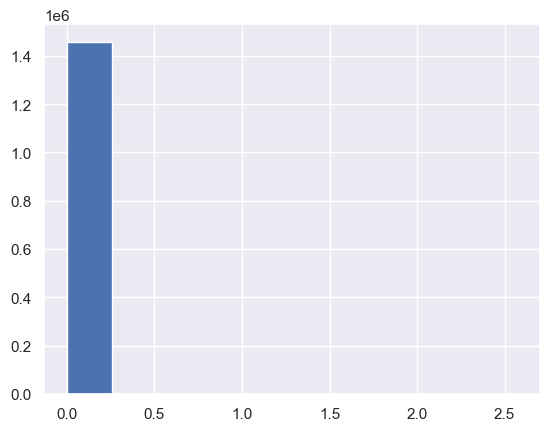

In [63]:
plt.hist(data['average_speed'])

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

(array([ 89506., 449663., 464765., 244056., 111332.,  51511.,  25540.,
         12927.,   5749.,   2136.]),
 array([0.        , 0.00150835, 0.00301669, 0.00452504, 0.00603338,
        0.00754173, 0.00905007, 0.01055842, 0.01206676, 0.01357511,
        0.01508345]),
 <BarContainer object of 10 artists>)

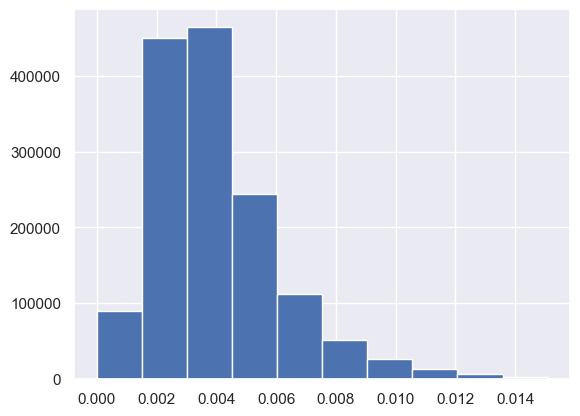

In [64]:
plt.hist(data['average_speed'].loc[data['average_speed'] < data['average_speed'].quantile(0.999)])

In [65]:
data.drop(['average_speed'], axis=1, inplace= True)

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

Потому что от скорости никак не зависит продолжительность поездки. Можно ехать на далекие и на близкие расстояния и одинаковой скоростью. 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 8 [+0.625 балла]**. Сейчас мы практически не используем прямые значения координат в анализе. Это связано с тем, что широта и долгота по отдельности не несут значимой информации, а их взаимосвязь с целевой переменной нелинейна. Чтобы эффективно интегрировать координаты в наш анализ, мы можем применить следующий подход: окружим область с наибольшим количеством поездок прямоугольником и разделим этот прямоугольник на ячейки. Каждой точке присвоим номер ячейки, в которой она находится, а точкам вне прямоугольника присвоим значение -1.

Создайте трансформер, который вначале делит указанную область на ячейки, а затем генерирует два признака: номер ячейки начала поездки и номер ячейки конца поездки. Выбор количества строк и столбцов оставьте на ваше усмотрение.

Важно, чтобы все вычисления были векторизованными, трансформер не изменял исходный набор данных, а все необходимые статистики вычислялись только по обучающей выборке в методе `fit`.

Этот подход важен по следующим причинам:

1. **Учет пространственной структуры**: Разбиение на ячейки позволяет учесть пространственную структуру данных, что может улучшить качество анализа и прогнозирования.

2. **Снижение размерности**: Преобразование координат в номера ячеек уменьшает размерность данных, что упрощает анализ и сокращает время вычислений.

3. **Улучшение интерпретируемости**: Номера ячеек могут быть более интерпретируемыми, чем сырые координаты, что облегчает понимание взаимосвязей в данных.

4. **Адаптация к нелинейным зависимостям**: Такой подход позволяет адаптироваться к нелинейным зависимостям между координатами и целевой переменной, что может повысить точность моделей.

In [66]:
from sklearn.base import BaseEstimator, TransformerMixin

In [159]:
class MapGridTransformer(BaseEstimator, TransformerMixin):
    

    def __init__(self, n_rows, n_cols, lat_min, lat_max, lon_min, lon_max):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_min = lat_min
        self.lat_max = lat_max
        self.lon_min = lon_min
        self.lon_max = lon_max
        

    def fit(self, X=None, y=None):
        
        self.cell_size_lat = (self.lat_max - self.lat_min) / self.n_rows
        self.cell_size_lon = (self.lon_max - self.lon_min) / self.n_cols
    
        
        return self

    def transform(self, X):

        self.X = X
        X_transformed = np.zeros((len(X), 2), dtype=int)
        lat_indices = ((X.values[:, 0] - self.lat_min) / self.cell_size_lat).astype(int)
        lon_indices = ((X.values[:, 1] - self.lon_min) / self.cell_size_lon).astype(int)
    
        X_transformed[:, 0] = np.where((lat_indices >= 0) & (lat_indices < self.n_rows), lat_indices, -1)
        X_transformed[:, 1] = np.where((lon_indices >= 0) & (lon_indices < self.n_cols), lon_indices, -1)
        Ans = np.where(
                ((X_transformed[:, 0] != -1) & (X_transformed[:, 1] != -1)),
                (X_transformed[:,0])*self.n_cols + (X_transformed[:,1]+1), -1)
    
        return Ans.reshape(-1,1)

    def show_map(self):
        
        mymap = folium.Map(location=[40.82667553124763, -74.02211248310374], zoom_start=10)
        for i in range(self.n_rows):
            for j in range(self.n_cols):
                lat1 = self.lat_min + i * self.cell_size_lat
                lat2 = self.lat_min + (i + 1) * self.cell_size_lat
                lon1 = self.lon_min + j * self.cell_size_lon
                lon2 = self.lon_min + (j + 1) * self.cell_size_lon
                folium.Rectangle(bounds=[(lat1, lon1), (lat2, lon2)], color='red').add_to(mymap)
        
        for _, row in self.X.sample(1000).iterrows():
            folium.Circle(
                radius=100,
                location=(row['pickup_latitude'], row['pickup_longitude']),
                color='blue',
                fill_color='blue',
                fill=True
            ).add_to(mymap)
            
        display(mymap)
        
        pass


In [68]:
x = data[['pickup_latitude', 'pickup_longitude']]

In [69]:
#                      lat                  lon
# левый нижний    40.6976614053391, -74.02211248310374
# левый верхний   40.82667553124763, -74.02211248310374
# правый верхний  40.82667553124763, -73.92972884373326
# правый нижний   40.6976614053391, -73.92972884373326

In [70]:
map_grid = MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326)

map_grid.fit()

X_transformed = map_grid.transform(x)
map_grid.show_map()

**Получаем номер клетки от 0 до 11**


In [157]:
X_transformed

array([[ 8],
       [ 5],
       [ 8],
       ...,
       [ 9],
       [ 5],
       [11]])

In [72]:
# data['pickup_location'] = X_transformed

**Задание 9 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [73]:
pickup_feachures = ['pickup_latitude', 'pickup_longitude']
dropoff_feachures = ['dropoff_latitude', 'dropoff_longitude']
numeric_features = ['Hour', 'Day']
categorical_features = ['Month', 'anomaly_day']


preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('coord1', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), pickup_feachures),
        ('coord2', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), dropoff_feachures)
    ])



pipeline2 = Pipeline(steps=[('preprocessor', preprocessor2),
                           ('regressor', Ridge())])

X = data[['Hour', 'Day', 'Month', 'anomaly_day', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']]
y = data['log_duration']

pipeline2.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Hour', 'Day']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Month', 'anomaly_day']),
                                                 ('coord1',
                                                  MapGridTransformer(lat_max=40.80418,
                                                                     lat_min=40.6976614053391,
                                                                     lon_max=-73.92972884373326,
                                                                     lon_min=-74.02211248310374,
                                                                     n_cols=3,
                                                                     n_rows=4),
                                                  ['pickup_latitude',
        

In [74]:
X_test_real2 =test[['Hour', 'Day', 'Month', 'anomaly_day', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude' ]]


In [75]:
prediction2 = pipeline2.predict(X_test_real2)

In [76]:
mse2 = mean_squared_error(Y_true, prediction2)
print("MSE второй модели:", mse2)

MSE второй модели: 0.19478670630328554


## Часть 3. Изучаем оставшиеся признаки & Обучаем модель [+0.5 балла]


**Задание 10 [+0.375 балла]**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

**Ответ:** Возможно такси на небольшие расстояния вызывают компании людей, чтобы добраться до места назначения быстро и за небольшие деньги на каждого человека. Но если людей наоборот слишком много, то это может быть поездка в микроавтобусе большой компанией на далекие расстояния, например, в пригород.\
ID провайдера может быть важен в том случае, если один провайдер осуществляет, например, поездки в пригород, и берется за более долгие поездки, а другой провайдер обеспечивает поездки только в черте города.\
Честно говоря, смысл 'store_and_fwd_flag' я не совсем понимаю.

In [77]:
data['passenger_count'].nunique()

10

In [78]:
data['store_and_fwd_flag'].nunique()

2

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<AxesSubplot:xlabel='vendor_id', ylabel='log_duration'>

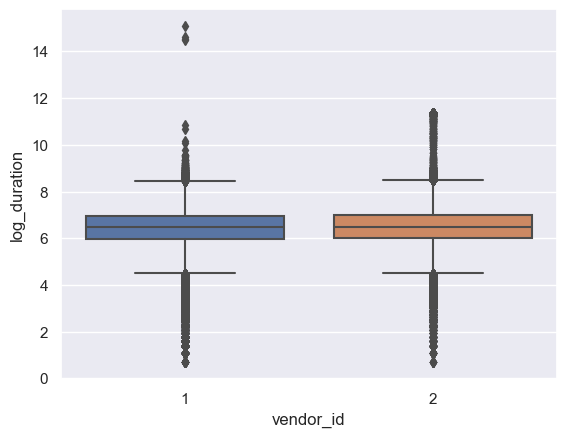

In [79]:
sns.boxplot(x ='vendor_id', y = 'log_duration', data = data)

<AxesSubplot:xlabel='passenger_count', ylabel='log_duration'>

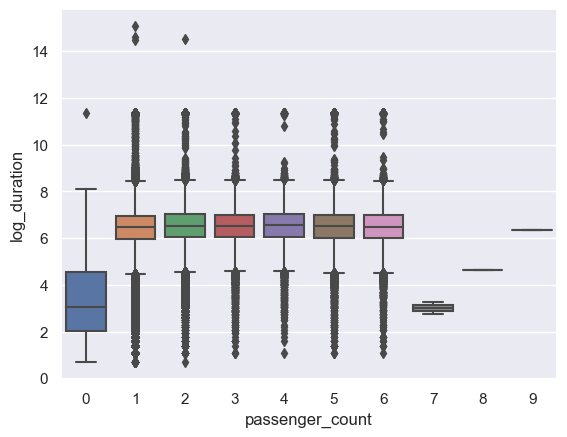

In [80]:
sns.boxplot(x ='passenger_count', y = 'log_duration', data = data)

<AxesSubplot:xlabel='store_and_fwd_flag', ylabel='log_duration'>

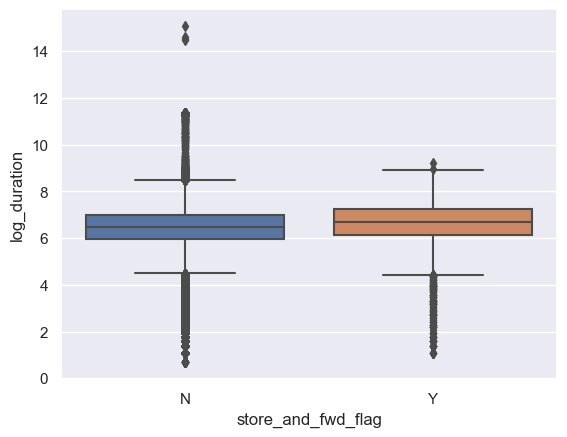

In [81]:
sns.boxplot(x ='store_and_fwd_flag', y = 'log_duration', data = data)

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [82]:
data['vendor_id'] = data['vendor_id'] -1
data['store_and_fwd_flag'] = np.where((data['store_and_fwd_flag'] == 'Y' ), 1, 0 )

In [83]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  log_duration  \
0               40.765602                   0            455      6.122493   
1               40.731152                   0            663      6.498282   
2               40.710087                   0           2124      7.661527   
3               40.706718                   0            429      6.063785   
4               40.782520                   0            435      6.077642   
...                   ...                 ...            ...           ...   
1458639         40.740170                   0            778      6.658011   
1458640         40.796547                   0            655      6.486161   
1458641         40.707371                   0            764      6.639876   
1458642         40.757107                   0            373      5.924256   
1458643         40.790585                   0            198      5.293305   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  haversine  \
0        2016-03-14    17    0      3           74            0   1.498523   
1        2016-06-12     0    6      6          164            0   1.805510   
2        2016-01-19    11    1      1           19            0   6.385107   
3        2016-04-06    19    2      4           97            0   1.485500   
4        2016-03-26    13    5      3           86            0   1.188590   
...             ...   ...  ...    ...          ...          ...        ...   
1458639  2016-04-08    13    4      4           99            0   1.225082   
1458640  2016-01-10     7    6      1           10            0   6.049844   
1458641  2016-04-22     6    4      4          113            0   7.824617   
1458642  2016-01-05    15    1      1            5            0   1.092565   
1458643  2016-04-05    14    1      4           96            0   1.134044   

         log_haversine  
0             0.915700  
1             1.031585  
2             1.999465  
3             0.910474  
4             0.783258  
...                ...  
1458639       0.799794  
1458640       1.953005  
1458641       2.177545  
1458642       0.738391  
1458643       0.758019  

[1458644 rows x 19 columns]

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ:** По боксплоту для количества пассажиров можно сделать вывод, что в среднем продолжительность поездки не зависит от количества пассажиров. Прослеживается слабая зависимость, что поездки, где несколько пассажиров, реже бывают дольше, чем 75% всех поездок, т.е выбросов выше верхнего "уса" меньше и меньше при увеличении количества пассажиров. Но я думаю, что эта зависимость не очень сильная, т.к этих выборосов везде достаточно много. 0, 7, 8, 9 пассажиров мы не берем в расчет, потому что это по всей видимости какая-то ошибка в системе. Еще, посмотрев на продолжительности поездки с нулем человек, можно сказать, что чаще всего ошибочно начатая поездка, потому что большинство из них длятся около 10 секунд.\
Также видно, что чаще водители не сохраняли поездку в память машины, когда брали длинные поездки.\
Ну а еще перевозчик 2 чаще берется за длительные поездки, но как будто бы разница незначительная.


**Задание 11 [+0.125 балла]**. Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы определили в этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [84]:
numeric_features = ['passenger_count']
categorical_features = ['vendor_id', 'store_and_fwd_flag']


preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough')



pipeline3 = Pipeline(steps=[('preprocessor', preprocessor3),
                           ('regressor', Ridge())])

X = data[['vendor_id', 'passenger_count', 'store_and_fwd_flag']]
y = data['log_duration']

pipeline3.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['passenger_count']),
                                                 ('cat', OneHotEncoder(),
                                                  ['vendor_id',
                                                   'store_and_fwd_flag'])])),
                ('regressor', Ridge())])

In [85]:
X_test_real3 = test[['vendor_id', 'passenger_count', 'store_and_fwd_flag']]

In [86]:
X_test_real3.loc[:, 'vendor_id'] = X_test_real3['vendor_id'] - 1
X_test_real3.loc[:, 'store_and_fwd_flag'] = np.where(X_test_real3['store_and_fwd_flag'] == 'Y', 1, 0)

C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\3892000184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real3.loc[:, 'vendor_id'] = X_test_real3['vendor_id'] - 1
C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\3892000184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real3.loc[:, 'store_and_fwd_flag'] = np.where(X_test_real3['store_and_fwd_flag'] == 'Y', 1, 0)


In [87]:
prediction3 = pipeline3.predict(X_test_real3)

In [88]:
mse3 = mean_squared_error(Y_true, prediction3 )
print("MSE третьей модели:", mse3)

MSE третьей модели: 0.16058088209512958


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**fact:**Строя модель только на этих признаках мы получили на данный момент самый низкий лосс

## Часть 4. Улучшаем модель [+1.5 балла]

**Задание 12 [+0.5 балла]**. В нашем наборе данных присутствуют аномальные записи: объекты с необычно коротким временем поездки, слишком большим пройденным расстоянием или с большими остатками после регрессии. В этом задании предлагается исключить такие объекты из обучающего набора. Для этого постройте гистограммы распределения указанных величин, определите объекты, которые можно считать выбросами, и очистите __обучающий набор__ от них.

Следует отметить, что, несмотря на то что эти объекты кажутся выбросами, в тестовом наборе данных также могут присутствовать объекты с аналогичными аномальными значениями. Поэтому удаление выбросов из обучающего набора может привести к ухудшению качества на тестовом наборе. Однако, в целом, рекомендуется удалять выбросы из обучающего набора, чтобы получить более разумную и интерпретируемую модель.

Для определения выбросов можно использовать различные методы, такие как:

- **Z-оценка**: Выбросы определяются как объекты, у которых абсолютное значение Z-оценки (стандартизированное значение) превышает определенный порог (например, 3).

- **IQR (межквартильный размах)**: Выбросы определяются как объекты, значения которых выходят за пределы [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR], где Q1 и Q3 — первый и третий квартили соответственно.


In [89]:
data.drop(['log_haversine'], axis = 1, inplace= True)
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  log_duration  \
0               40.765602                   0            455      6.122493   
1               40.731152                   0            663      6.498282   
2               40.710087                   0           2124      7.661527   
3               40.706718                   0            429      6.063785   
4               40.782520                   0            435      6.077642   
...                   ...                 ...            ...           ...   
1458639         40.740170                   0            778      6.658011   
1458640         40.796547                   0            655      6.486161   
1458641         40.707371                   0            764      6.639876   
1458642         40.757107                   0            373      5.924256   
1458643         40.790585                   0            198      5.293305   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  haversine  
0        2016-03-14    17    0      3           74            0   1.498523  
1        2016-06-12     0    6      6          164            0   1.805510  
2        2016-01-19    11    1      1           19            0   6.385107  
3        2016-04-06    19    2      4           97            0   1.485500  
4        2016-03-26    13    5      3           86            0   1.188590  
...             ...   ...  ...    ...          ...          ...        ...  
1458639  2016-04-08    13    4      4           99            0   1.225082  
1458640  2016-01-10     7    6      1           10            0   6.049844  
1458641  2016-04-22     6    4      4          113            0   7.824617  
1458642  2016-01-05    15    1      1            5            0   1.092565  
1458643  2016-04-05    14    1      4           96            0   1.134044  

[1458644 rows x 18 columns]

(array([750765., 370086., 134328.,  60701.,  47732.,  20227.,  13130.,
          8138.,   7029.,  17334.]),
 array([ 0.13911317,  2.20394819,  4.26878321,  6.33361823,  8.39845325,
        10.46328826, 12.52812328, 14.5929583 , 16.65779332, 18.72262834,
        20.78746335]),
 <BarContainer object of 10 artists>)

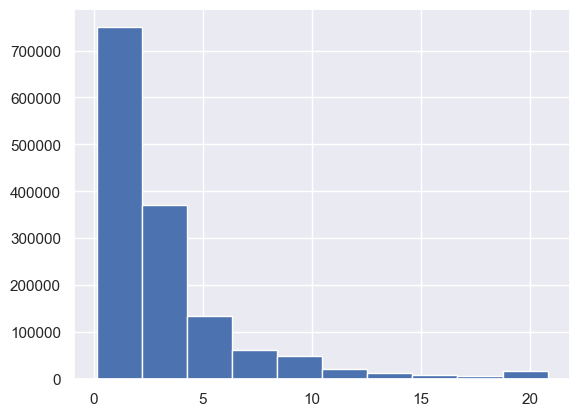

In [90]:
plt.hist(data['haversine'].loc[(data['haversine'] < data['haversine'].quantile(0.99)) 
                               & (data['haversine'] > data['haversine'].quantile(0.01))])

(array([389704., 431720., 268588., 150954.,  83289.,  45974.,  26205.,
         16033.,  10289.,   6503.]),
 array([  88. ,  423.1,  758.2, 1093.3, 1428.4, 1763.5, 2098.6, 2433.7,
        2768.8, 3103.9, 3439. ]),
 <BarContainer object of 10 artists>)

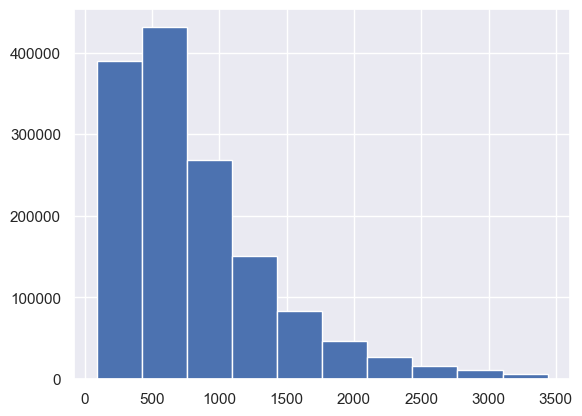

In [91]:
plt.hist(data['trip_duration'].loc[(data['trip_duration'] < data['trip_duration'].quantile(0.99))
                                  & (data['trip_duration'] > data['trip_duration'].quantile(0.01))])

In [92]:
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.99))
            & (data['trip_duration'] > data['trip_duration'].quantile(0.01))]
data = data[(data['haversine'] < data['haversine'].quantile(0.99))
            & (data['haversine'] > data['haversine'].quantile(0.01))]

(array([ 12665.,  20335.,  49040.,  88279., 109546., 112370.,  97443.,
         76375.,  44910.,  14171.]),
 array([-0.5385206 , -0.51224923, -0.48597786, -0.45970649, -0.43343512,
        -0.40716375, -0.38089238, -0.35462101, -0.32834964, -0.30207827,
        -0.2758069 ]),
 <BarContainer object of 10 artists>)

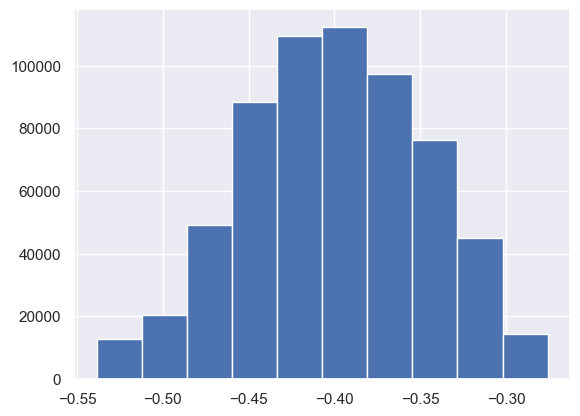

In [93]:
plt.hist(prediction1 - Y_true)

(array([  3253.,  32654.,  91279., 151341., 147773., 118098.,  57482.,
         18007.,   4280.,    967.]),
 array([-0.93512534, -0.81024058, -0.68535582, -0.56047106, -0.4355863 ,
        -0.31070154, -0.18581678, -0.06093203,  0.06395273,  0.18883749,
         0.31372225]),
 <BarContainer object of 10 artists>)

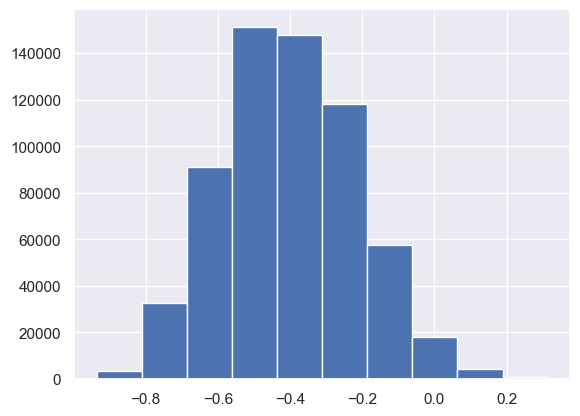

In [94]:
plt.hist(prediction2 - Y_true)

(array([2.72396e+05, 2.21871e+05, 7.37110e+04, 5.37240e+04, 0.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.76200e+03, 6.68000e+02]),
 array([-0.43171492, -0.40940622, -0.38709752, -0.36478883, -0.34248013,
        -0.32017143, -0.29786273, -0.27555403, -0.25324533, -0.23093664,
        -0.20862794]),
 <BarContainer object of 10 artists>)

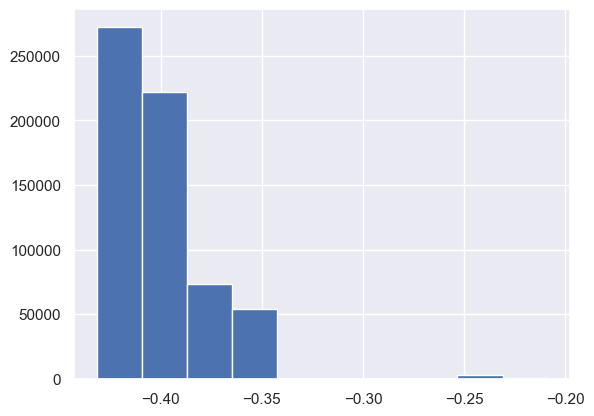

In [95]:
plt.hist(prediction3 - Y_true)

In [96]:
data = data[(data['trip_duration'] < data['trip_duration'].quantile(0.99))
            & (data['trip_duration'] > data['trip_duration'].quantile(0.01))]
data = data[(data['haversine'] < data['haversine'].quantile(0.99))
            & (data['haversine'] > data['haversine'].quantile(0.01))]

Очистим данные от величин вне диапазона от 1 до 99 перцентиля

**Третья модель не занижает оценки больше чем на -0.45, а остальные модели допускают ошибку согласно колоколообразному распределению с центром в -0.4**

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [97]:
data[data['store_and_fwd_flag'] == 1]

id  vendor_id     pickup_datetime  passenger_count  \
348      id1633648          0 2016-06-20 14:19:16                1   
491      id2042535          0 2016-02-12 12:36:38                1   
610      id0909228          0 2016-05-08 15:02:28                1   
774      id3697489          0 2016-01-13 13:53:29                1   
846      id1026973          0 2016-06-25 21:53:30                1   
...            ...        ...                 ...              ...   
1457553  id2925716          0 2016-04-12 10:57:32                1   
1457556  id2229555          0 2016-01-22 19:05:50                1   
1457897  id3209015          0 2016-03-20 18:49:55                1   
1458060  id1371896          0 2016-03-28 11:45:49                1   
1458416  id2463060          0 2016-01-04 14:35:34                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
348            -73.977905        40.754871         -73.952774   
491            -73.978981        40.756519         -73.992165   
610            -73.988510        40.742935         -74.010620   
774            -73.948982        40.781578         -73.982346   
846            -73.982628        40.762341         -73.995537   
...                   ...              ...                ...   
1457553        -73.961533        40.760345         -73.959259   
1457556        -73.874535        40.774082         -73.925362   
1457897        -73.990097        40.714352         -74.002579   
1458060        -73.971008        40.759079         -74.010025   
1458416        -73.985489        40.753231         -73.982491   

         dropoff_latitude  store_and_fwd_flag  trip_duration  log_duration  \
348             40.768166                   1            918      6.823286   
491             40.749203                   1            629      6.445720   
610             40.723507                   1            926      6.831954   
774             40.778923                   1            892      6.794587   
846             40.749779                   1            717      6.576470   
...                   ...                 ...            ...           ...   
1457553         40.769260                   1            264      5.579730   
1457556         40.732521                   1           1279      7.154615   
1457897         40.750145                   1           1170      7.065613   
1458060         40.720810                   1           2156      7.676474   
1458416         40.768139                   1            592      6.385194   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  haversine  
348      2016-06-20    14    0      6          172            0   2.581730  
491      2016-02-12    12    4      2           43            0   1.376632  
610      2016-05-08    15    6      5          129            0   2.852653  
774      2016-01-13    13    2      1           13            0   2.824636  
846      2016-06-25    21    5      6          177            0   1.770124  
...             ...   ...  ...    ...          ...          ...        ...  
1457553  2016-04-12    10    1      4          103            0   1.009621  
1457556  2016-01-22    19    4      1           22            0   6.299766  
1457897  2016-03-20    18    6      3           80            0   4.116649  
1458060  2016-03-28    11    0      3           88            0   5.377109  
1458416  2016-01-04    14    0      1            4            0   1.676803  

[6879 rows x 18 columns]

Обучите регрессию `Ridge` с использованием параметров по умолчанию, применив `OneHotEncoder` для кодирования всех категориальных признаков и `StandardScaler` для масштабирования численных признаков (используйте `ColumnTransformer` и `PipeLine`. Ограничьтесь признаками, которые мы сделали до этой части задания. Замерьте качество на тестовой выборке (RMSLE)

In [98]:
pickup_feachures = ['pickup_latitude', 'pickup_longitude']
dropoff_feachures = ['dropoff_latitude', 'dropoff_longitude']
numeric_features = ['passenger_count']
categorical_features = ['Hour', 'Day','Month', 'anomaly_day', 'vendor_id', 'store_and_fwd_flag']


preprocessor4 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('coord1', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), pickup_feachures),
        ('coord2', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), dropoff_feachures)
    ])



pipeline4 = Pipeline(steps=[('preprocessor', preprocessor4),
                           ('regressor', Ridge())])

X = data[['Hour', 'Day', 'Month', 'anomaly_day', 'pickup_latitude', 'passenger_count',
          'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'vendor_id', 'store_and_fwd_flag']]
y = data['log_duration']

pipeline4.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Hour', 'Day', 'Month',
                                                   'anomaly_day', 'vendor_id',
                                                   'store_and_fwd_flag']),
                                                 ('coord1',
                                                  MapGridTransformer(lat_max=40.80418,
                                                                     lat_min=40.6976614053391,
                                                                     lon_max=-73.92972884373326,
                                                                     lon_min=-74.02211248310374,
                                                                     n_cols=3,
  

In [99]:
X_test_real4 = test[['Hour', 'Day', 'Month', 'anomaly_day', 'pickup_latitude', 'passenger_count',
          'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'vendor_id', 'store_and_fwd_flag']]

In [100]:
X_test_real4.loc[:, 'vendor_id'] = X_test_real4['vendor_id'] - 1
X_test_real4.loc[:, 'store_and_fwd_flag'] = np.where(X_test_real4['store_and_fwd_flag'] == 'Y', 1, 0)

C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\851052332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real4.loc[:, 'vendor_id'] = X_test_real4['vendor_id'] - 1
C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\851052332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real4.loc[:, 'store_and_fwd_flag'] = np.where(X_test_real4['store_and_fwd_flag'] == 'Y', 1, 0)


In [101]:
prediction4 = pipeline4.predict(X_test_real4)

In [102]:
mse4 = mean_squared_error(Y_true, prediction4)
print("MSE четвертой модели:", mse4)

MSE четвертой модели: 0.18254783904310426


**Задание 13 [+0.5 балла]**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [103]:
#╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [104]:
pickup_feachures = ['pickup_latitude', 'pickup_longitude']
dropoff_feachures = ['dropoff_latitude', 'dropoff_longitude']
numeric_features = ['passenger_count']
categorical_features = ['Hour', 'Day','Month', 'anomaly_day', 'vendor_id', 'store_and_fwd_flag']


preprocessor5 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('coord1', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), pickup_feachures),
        ('coord2', MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326), dropoff_feachures)
    ])



pipeline5 = Pipeline(steps=[('preprocessor', preprocessor5),
                           ('regressor', Lasso())])

X5 = data[['Hour', 'Day', 'Month', 'anomaly_day', 'pickup_latitude', 'passenger_count',
          'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'vendor_id', 'store_and_fwd_flag']]
y5 = data['log_duration']

pipeline5.fit(X5, y5)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Hour', 'Day', 'Month',
                                                   'anomaly_day', 'vendor_id',
                                                   'store_and_fwd_flag']),
                                                 ('coord1',
                                                  MapGridTransformer(lat_max=40.80418,
                                                                     lat_min=40.6976614053391,
                                                                     lon_max=-73.92972884373326,
                                                                     lon_min=-74.02211248310374,
                                                                     n_cols=3,
  

In [105]:
X_test_real5 = X_test_real4

In [106]:
prediction5 = pipeline5.predict(X_test_real5)

In [135]:
mse5 = mean_squared_error(Y_true, prediction5)
print("MSE пятой модели:", mse5)

MSE пятой модели: 0.15995854840486762


**Lasso регрессия справилась намного лучше**

По тренировочной выборке с помощью кросс-валидации (`zGridSearchCV`) подберите оптимальные значения параметра регуляризации (alpha, lambda в разных литературах по-разному) для `Ridge` и `Lasso` на тестовой выборке измерьте качество лучшей полученной модели.

In [108]:
from sklearn.model_selection import GridSearchCV

In [120]:
param_grid = {'regressor__alpha': np.arange(0.1, 3, 0.1) }
grid_search = GridSearchCV(pipeline5, param_grid, scoring= 'neg_mean_squared_error', n_jobs = -1, cv= 5 )


In [121]:
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['passenger_count']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Hour',
                                                                          'Day',
                                                                          'Month',
                                                                          'anomaly_day',
                                                                          'vendor_id',
                                                                   

In [122]:
grid_search.fit(X5, y5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['passenger_count']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Hour',
                                                                          'Day',
                                                                          'Month',
                                                                          'anomaly_day',
                                                                          'vendor_id',
                                                                   

In [136]:
best_lasso_estimatior = grid_search.best_estimator_

In [137]:
prediction6 = best_lasso_estimatior.predict(X_test_real5)

In [138]:
mse6 = mean_squared_error(Y_true, prediction6)
print("MSE шестой модели:", mse6)

MSE шестой модели: 0.16598426622191811


In [139]:
grid_search1 = GridSearchCV(pipeline4, param_grid, scoring= 'neg_mean_squared_error', n_jobs = -1, cv= 5 )

In [140]:
grid_search1.fit(X5, y5)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['passenger_count']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Hour',
                                                                          'Day',
                                                                          'Month',
                                                                          'anomaly_day',
                                                                          'vendor_id',
                                                                   

In [141]:
best_ridge_estimatior = grid_search1.best_estimator_

In [142]:
prediction7 = best_ridge_estimatior.predict(X_test_real5)

In [143]:
mse7 = mean_squared_error(Y_true, prediction7)
print("MSE седьмой модели:", mse7)

MSE седьмой модели: 0.18254699244941353


**Для Ridge регрессии подбор параметров по сетке уменьшил итоговый лосс, для Lacco регрессии лосс на модели после подбора парметров по сетке увеличился, но, видимо, эта модель устойчивее и в среднем дает самые лучшие предсказания, т.к при подборе параметров с помощью GridSearchCV используется кросс валидация результата.**

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 14 [+0.5 балла]**. Использование взаимодействия признаков часто оказывается полезным для улучшения качества модели. Мы уже разделили карту Манхэттена на ячейки и создали признаки, указывающие на ячейку начала и окончания поездки.

Теперь предлагается пойти дальше и посчитать, как часто встречается каждая возможная пара этих признаков в нашем наборе данных. Затем выберем 100 самых частых пар и закодируем поездки с этими парами как категориальный признак, а для остальных объектов установим значение -1. Таким образом, мы сможем кодировать информацию о маршруте поездки такси.

Создание таких признаков может быть круто по нескольким причинам:

1. **Улучшение предсказаний**: Комбинация начальной и конечной точек поездки может содержать важную информацию о времени поездки, которая поможет улучшить предсказательную способность модели.

2. **Выявление популярных маршрутов**: Анализ самых частых пар ячеек может помочь выявить наиболее популярные маршруты, что может быть полезно для планирования транспортных услуг.

3. **Интерпретируемость**: Новые признаки, основанные на маршрутах, могут улучшить интерпретируемость модели, позволяя лучше понять, как различные маршруты влияют на время поездки.

4. **Адаптация к специфике данных**: Такой подход позволяет адаптировать модель к специфике данных о поездках такси, учитывая географическую структуру города и особенности движения.

Также вы можете придумать другие способы создания признаков, связанных с маршрутом, которые могут дать дополнительные баллы при сдаче этого домашнего задания


In [144]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  log_duration  \
0               40.765602                   0            455      6.122493   
1               40.731152                   0            663      6.498282   
2               40.710087                   0           2124      7.661527   
3               40.706718                   0            429      6.063785   
4               40.782520                   0            435      6.077642   
...                   ...                 ...            ...           ...   
1458639         40.740170                   0            778      6.658011   
1458640         40.796547                   0            655      6.486161   
1458641         40.707371                   0            764      6.639876   
1458642         40.757107                   0            373      5.924256   
1458643         40.790585                   0            198      5.293305   

        pickup_date  Hour  Day  Month  Day_of_year  anomaly_day  haversine  
0        2016-03-14    17    0      3           74            0   1.498523  
1        2016-06-12     0    6      6          164            0   1.805510  
2        2016-01-19    11    1      1           19            0   6.385107  
3        2016-04-06    19    2      4           97            0   1.485500  
4        2016-03-26    13    5      3           86            0   1.188590  
...             ...   ...  ...    ...          ...          ...        ...  
1458639  2016-04-08    13    4      4           99            0   1.225082  
1458640  2016-01-10     7    6      1           10            0   6.049844  
1458641  2016-04-22     6    4      4          113            0   7.824617  
1458642  2016-01-05    15    1      1            5            0   1.092565  
1458643  2016-04-05    14    1      4           96            0   1.134044  

[1344873 rows x 18 columns]

In [160]:
map_grid = MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326)

map_grid.fit()

pickup_transformed = map_grid.transform(data[['pickup_latitude', 'pickup_longitude']])
dropoff_transformed = map_grid.transform(data[['dropoff_latitude', 'dropoff_longitude']])

In [165]:
pickup_transformed

array([[ 8],
       [ 5],
       [ 8],
       ...,
       [ 9],
       [ 5],
       [11]])

In [224]:
data['pickup_location'] = pickup_transformed
data['dropoff_location'] = dropoff_transformed

In [225]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  \
0               40.765602                   0            455  ...   
1               40.731152                   0            663  ...   
2               40.710087                   0           2124  ...   
3               40.706718                   0            429  ...   
4               40.782520                   0            435  ...   
...                   ...                 ...            ...  ...   
1458639         40.740170                   0            778  ...   
1458640         40.796547                   0            655  ...   
1458641         40.707371                   0            764  ...   
1458642         40.757107                   0            373  ...   
1458643         40.790585                   0            198  ...   

         pickup_date Hour  Day  Month  Day_of_year  anomaly_day  haversine  \
0         2016-03-14   17    0      3           74            0   1.498523   
1         2016-06-12    0    6      6          164            0   1.805510   
2         2016-01-19   11    1      1           19            0   6.385107   
3         2016-04-06   19    2      4           97            0   1.485500   
4         2016-03-26   13    5      3           86            0   1.188590   
...              ...  ...  ...    ...          ...          ...        ...   
1458639   2016-04-08   13    4      4           99            0   1.225082   
1458640   2016-01-10    7    6      1           10            0   6.049844   
1458641   2016-04-22    6    4      4          113            0   7.824617   
1458642   2016-01-05   15    1      1            5            0   1.092565   
1458643   2016-04-05   14    1      4           96            0   1.134044   

         picup_location  dropoff_location  pickup_location  
0                     8                 8                8  
1                     5                 4                5  
2                     8                 1                8  
3                     1                 1                1  
4                    11                11               11  
...                 ...               ...              ...  
1458639               5                 4                5  
1458640               4                11                4  
1458641               9                 1                9  
1458642           

In [227]:
pairs_count = data.groupby(['pickup_location','dropoff_location']).size().reset_index(name='Count')
pairs_count = pairs_count[(pairs_count['pickup_location'] != -1) & (pairs_count['dropoff_location'] != -1)]

In [228]:
pairs_count

pickup_location  dropoff_location  Count
14                 1                 1  22113
15                 1                 2   8640
16                 1                 3   2672
17                 1                 4  21940
18                 1                 5  15129
..               ...               ...    ...
146               12                 7    789
147               12                 8  19762
148               12                 9  10439
149               12                11   8641
150               12                12  12923

[127 rows x 3 columns]

**В итоге мы получили 127 пар ячеек, и вряд ли будет полезным выделять 100 самых популярных направлений, потому что на последних местах количество поездок будет очень мало, и эта информация никак не пригодится. Оставим 30**

In [230]:
most_common_pairs = pairs_count.nlargest(30, 'Count')

In [231]:
most_common_pairs[['pickup_location', 'dropoff_location']].values

array([[ 8,  8],
       [ 8,  5],
       [ 5,  8],
       [ 4,  4],
       [ 5,  5],
       [ 4,  8],
       [ 4,  5],
       [ 8,  4],
       [ 5,  4],
       [ 8,  9],
       [ 8, 11],
       [ 9,  8],
       [11,  8],
       [ 4,  1],
       [ 8, 12],
       [11, 11],
       [ 1,  1],
       [ 1,  4],
       [12,  8],
       [ 8,  7],
       [ 7,  8],
       [ 8,  1],
       [ 5,  1],
       [ 1,  8],
       [ 1,  5],
       [12, 12],
       [ 9, 12],
       [ 4,  7],
       [ 5,  2],
       [ 9,  9]], dtype=int64)

In [232]:
pair_to_category = {tuple(pair): i + 1 for i, pair in enumerate(most_common_pairs[['pickup_location', 'dropoff_location']].values)}


In [236]:
def assign_category(row):
    pair = (row['pickup_location'], row['dropoff_location'])
    return pair_to_category.get(pair, -1)  

In [237]:
data['category'] = data.apply(assign_category, axis=1)

In [254]:
data

id  vendor_id     pickup_datetime  passenger_count  \
0        id2875421          1 2016-03-14 17:24:55                1   
1        id2377394          0 2016-06-12 00:43:35                1   
2        id3858529          1 2016-01-19 11:35:24                1   
3        id3504673          1 2016-04-06 19:32:31                1   
4        id2181028          1 2016-03-26 13:30:55                1   
...            ...        ...                 ...              ...   
1458639  id2376096          1 2016-04-08 13:31:04                4   
1458640  id1049543          0 2016-01-10 07:35:15                1   
1458641  id2304944          1 2016-04-22 06:57:41                1   
1458642  id2714485          0 2016-01-05 15:56:26                1   
1458643  id1209952          0 2016-04-05 14:44:25                1   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
0              -73.982155        40.767937         -73.964630   
1              -73.980415        40.738564         -73.999481   
2              -73.979027        40.763939         -74.005333   
3              -74.010040        40.719971         -74.012268   
4              -73.973053        40.793209         -73.972923   
...                   ...              ...                ...   
1458639        -73.982201        40.745522         -73.994911   
1458640        -74.000946        40.747379         -73.970184   
1458641        -73.959129        40.768799         -74.004433   
1458642        -73.982079        40.749062         -73.974632   
1458643        -73.979538        40.781750         -73.972809   

         dropoff_latitude  store_and_fwd_flag  trip_duration  ...  \
0               40.765602                   0            455  ...   
1               40.731152                   0            663  ...   
2               40.710087                   0           2124  ...   
3               40.706718                   0            429  ...   
4               40.782520                   0            435  ...   
...                   ...                 ...            ...  ...   
1458639         40.740170                   0            778  ...   
1458640         40.796547                   0            655  ...   
1458641         40.707371                   0            764  ...   
1458642         40.757107                   0            373  ...   
1458643         40.790585                   0            198  ...   

         pickup_date Hour  Day  Month  Day_of_year  anomaly_day  haversine  \
0         2016-03-14   17    0      3           74            0   1.498523   
1         2016-06-12    0    6      6          164            0   1.805510   
2         2016-01-19   11    1      1           19            0   6.385107   
3         2016-04-06   19    2      4           97            0   1.485500   
4         2016-03-26   13    5      3           86            0   1.188590   
...              ...  ...  ...    ...          ...          ...        ...   
1458639   2016-04-08   13    4      4           99            0   1.225082   
1458640   2016-01-10    7    6      1           10            0   6.049844   
1458641   2016-04-22    6    4      4          113            0   7.824617   
1458642   2016-01-05   15    1      1            5            0   1.092565   
1458643   2016-04-05   14    1      4           96            0   1.134044   

         dropoff_location  pickup_location  category  
0                       8                8         1  
1                       4                5         9  
2                       1                8        22  
3                       1                1        17  
4                      11               11        16  
...                   ...              ...       ...  
1458639                 4                5         9  
1458640                11                4        -1  
1458641                 1                9        -1  
1458642                 8                5         3  
1458643                

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Потому что линейная модель ищет зависимость между каждым предиктором и целевой переменной по отдельности. Линейная регрессия не дает ответы на такие вопросы, как, например "Влияют ли несколько переменных на целевую в совокупности при том, что по отдельности влияния не имеют".** 

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [243]:
map_grid = MapGridTransformer(4, 3, 40.6976614053391, 40.80418, -74.02211248310374, -73.92972884373326)

map_grid.fit()

pickup_transformed = map_grid.transform(X_test_real5[['pickup_latitude', 'pickup_longitude']])
dropoff_transformed = map_grid.transform(X_test_real5[['dropoff_latitude', 'dropoff_longitude']])
X_test_real5['pickup_location'] = pickup_transformed
X_test_real5['dropoff_location'] = dropoff_transformed

C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\505897138.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real5['pickup_location'] = pickup_transformed
C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\505897138.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real5['dropoff_location'] = dropoff_transformed


In [245]:
X_test_real5 ['category'] = X_test_real5 .apply(assign_category, axis=1)

C:\Users\sasha\AppData\Local\Temp\ipykernel_27860\1106110392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_real5 ['category'] = X_test_real5 .apply(assign_category, axis=1)


In [299]:
numeric_features = ['passenger_count']
categorical_features = ['Hour', 'Day', 'Month', 'anomaly_day',
                        'vendor_id', 'store_and_fwd_flag',  'dropoff_location', 'pickup_location', 'category']

preprocessor7 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ])



pipeline7 = Pipeline(steps=[('preprocessor', preprocessor7),
                           ('regressor', Lasso())])

X7 = data[['Hour', 'Day', 'Month', 'anomaly_day', 
           'passenger_count', 'vendor_id', 'store_and_fwd_flag', 'dropoff_location', 'pickup_location', 'category']]
X_test_real7 = X_test_real5[['Hour', 'Day', 'Month', 'anomaly_day', 
           'passenger_count', 'vendor_id', 'store_and_fwd_flag', 'dropoff_location', 'pickup_location', 'category']]
y7 = data['log_duration']

In [300]:
pipeline7

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Hour', 'Day', 'Month',
                                                   'anomaly_day', 'vendor_id',
                                                   'store_and_fwd_flag',
                                                   'dropoff_location',
                                                   'pickup_location',
                                                   'category'])])),
                ('regressor', Lasso())])

In [304]:
pipeline7.fit(X7, y7)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['passenger_count']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Hour', 'Day', 'Month',
                                                   'anomaly_day', 'vendor_id',
                                                   'store_and_fwd_flag',
                                                   'dropoff_location',
                                                   'pickup_location',
                                                   'category'])])),
                ('regressor', Lasso())])

In [306]:
prediction7 = pipeline7.predict(X_test_real7)
mse7 = mean_squared_error(Y_true, prediction7)
print("MSE седьмой модели:", mse6)

MSE седьмой модели: 0.16598426622191811
